# PHASE 4: EDA

###  General EDA on data

In [25]:

# A) Setup & Load

from pathlib import Path
import re, numpy as np, pandas as pd
import matplotlib.pyplot as plt

CLEAN = Path("Food_Production_clean.csv")
RAW   = Path("Food_Production.csv")
PATH  = CLEAN if CLEAN.exists() else RAW

df = pd.read_csv(PATH)

def detect_label(df):
    exact = {"food","food_product","product","item","entity","name"}
    low = {c.lower(): c for c in df.columns}
    for k in exact:
        if k in low: return low[k]
    obj = df.select_dtypes(include="object").columns.tolist()
    return obj[0] if obj else df.columns[0]

LABEL = detect_label(df)

print(f"Loaded: {PATH.name}  |  Shape: {df.shape}  |  Label column: {LABEL}")
display(df.head(5))


Loaded: Food_Production_clean.csv  |  Shape: (43, 25)  |  Label column: food_product


,food_product,land_use_change,animal_feed,farm,processing,transport,packging,retail,total_emissions,eutrophying_emissions_per_1000kcal_gpo₄eq_per_1000kcal,...,greenhouse_gas_emissions_per_1000kcal_kgco₂eq_per_1000kcal,greenhouse_gas_emissions_per_100g_protein_kgco₂eq_per_100g_protein,land_use_per_1000kcal_m²_per_1000kcal,land_use_per_kilogram_m²_per_kilogram,land_use_per_100g_protein_m²_per_100g_protein,scarcity_weighted_water_use_per_kilogram_liters_per_kilogram,scarcity_weighted_water_use_per_100g_protein_liters_per_100g_protein,scarcity_weighted_water_use_per_1000kcal_liters_per_1000_kilocalories,ghg_total_perkg,food_class
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,plant
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,plant
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,plant
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461,NaN,plant
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480,NaN,plant


In [26]:
# =========================
# B) Structure & Quality
# =========================
# Types
dtypes_tbl = df.dtypes.rename("dtype").to_frame().reset_index(names=["column"])
display(dtypes_tbl)

# Duplicates
dups = df.duplicated().sum()
print("Duplicate rows:", dups)

# Missingness
miss = df.isna().sum().sort_values(ascending=False)
display(miss[miss>0].to_frame("missing_count"))

# Quick negatives / zeros summary (numeric only)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
neg_total  = int(df[num_cols].lt(0).sum().sum())
zero_total = int(df[num_cols].eq(0).sum().sum())
print(f"Negative cells: {neg_total}  |  Zero cells: {zero_total}")


,column,dtype
0,food_product,object
1,land_use_change,float64
2,animal_feed,float64
3,farm,float64
4,processing,float64
5,transport,float64
6,packging,float64
7,retail,float64
8,total_emissions,float64
9,eutrophying_emissions_per_1000kcal_gpo₄eq_per_...,float64


Duplicate rows: 0


,missing_count
ghg_total_perkg,43
freshwater_withdrawals_per_100g_protein_liters_per_100g_protein,17
scarcity_weighted_water_use_per_100g_protein_liters_per_100g_protein,17
eutrophying_emissions_per_100g_protein_gpo₄eq_per_100_grams_protein,16
greenhouse_gas_emissions_per_100g_protein_kgco₂eq_per_100g_protein,16
land_use_per_100g_protein_m²_per_100g_protein,16
scarcity_weighted_water_use_per_1000kcal_liters_per_1000_kilocalories,13
freshwater_withdrawals_per_1000kcal_liters_per_1000kcal,13
land_use_per_1000kcal_m²_per_1000kcal,10
eutrophying_emissions_per_1000kcal_gpo₄eq_per_1000kcal,10


Negative cells: 0  |  Zero cells: 107


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
land_use_per_kilogram_m²_per_kilogram,38.0,29.264474,78.490074,0.330000,1.112500,6.865000,14.917500,369.810000,3.862069,14.539921
farm,43.0,3.469767,7.083264,0.100000,0.350000,0.800000,2.200000,39.400000,3.721835,16.072419
total_emissions,43.0,5.972093,10.501753,0.200000,0.850000,1.600000,6.000000,59.600000,3.618267,16.084152
land_use_change,39.0,1.458974,3.457389,0.000000,0.000000,0.200000,0.950000,16.300000,3.604617,13.122939
land_use_per_1000kcal_m²_per_1000kcal,33.0,12.423165,28.348693,0.273756,1.312500,2.976244,6.605405,119.490842,3.434621,11.303909
greenhouse_gas_emissions_per_1000kcal_kgco₂eq_per_1000kcal,33.0,5.633943,10.613575,0.069919,0.628415,1.351351,5.335135,50.946429,3.362409,11.945098
scarcity_weighted_water_use_per_100g_protein_liters_per_100g_protein,26.0,59196.438503,89928.189299,421.250000,11018.401008,20917.213595,70651.721023,431620.000000,3.230308,12.080532
greenhouse_gas_emissions_per_100g_protein_kgco₂eq_per_100g_protein,27.0,13.524906,19.427462,0.263319,4.027439,6.500000,14.983333,93.300000,3.119120,11.138860
eutrophying_emissions_per_kilogram_gpo₄eq_per_kilogram,38.0,46.141316,82.808808,0.690000,3.752500,11.460000,45.840000,365.290000,2.762100,7.553148
land_use_per_100g_protein_m²_per_100g_protein,27.0,29.105042,49.307339,3.000000,5.088235,7.936314,23.002381,184.812594,2.526165,5.311747


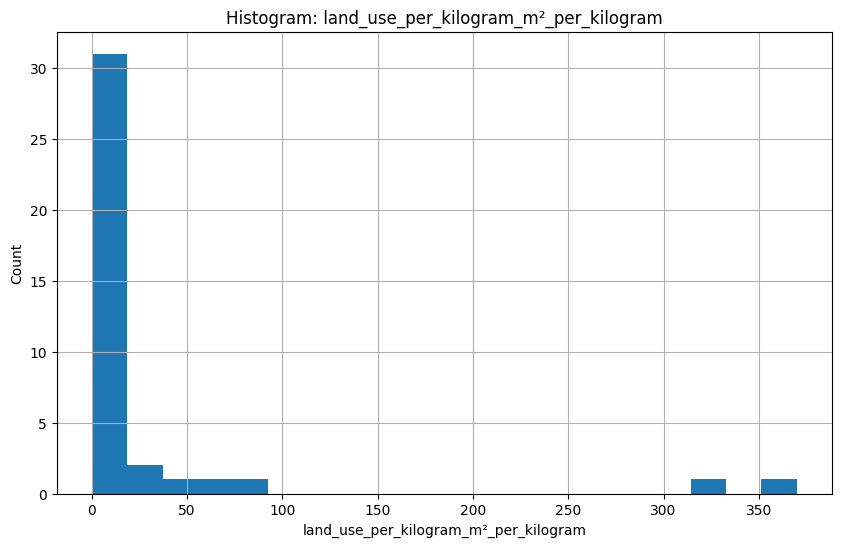

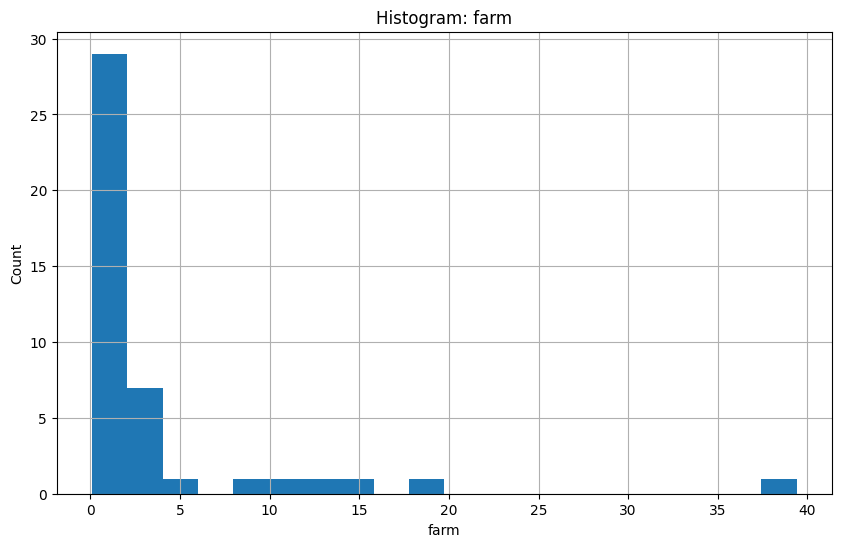

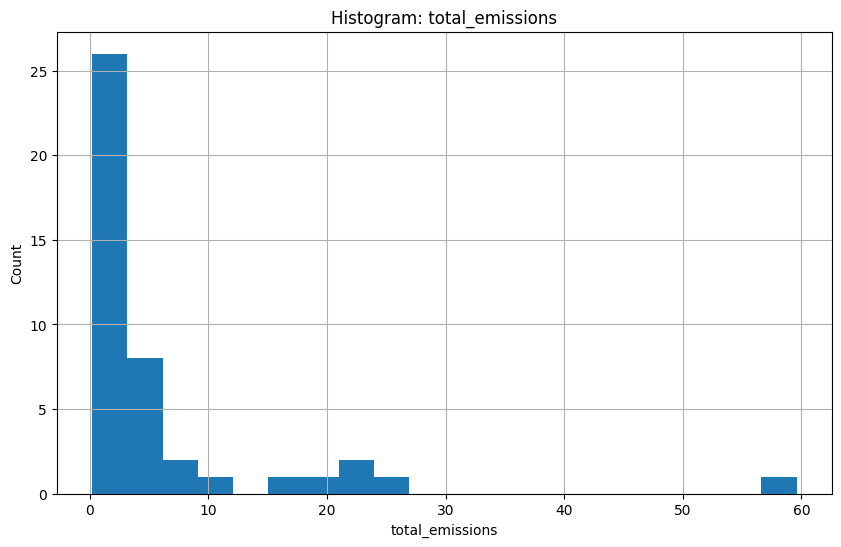

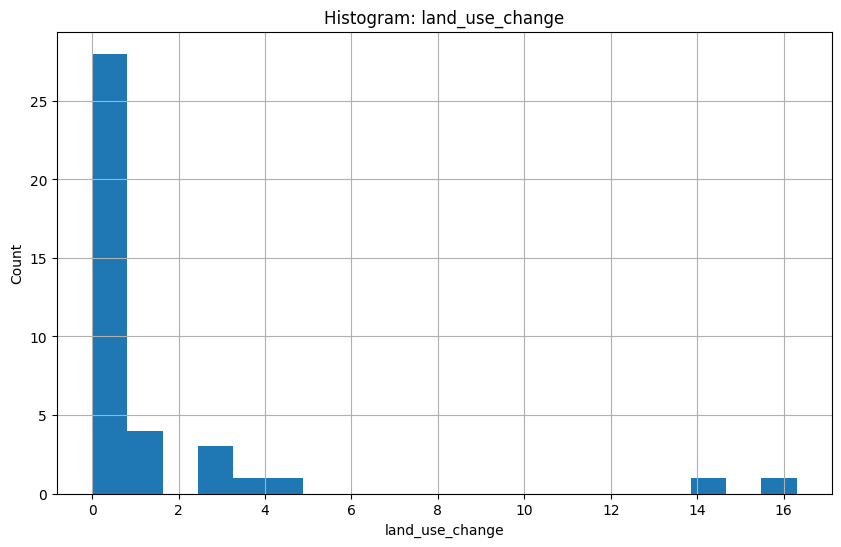

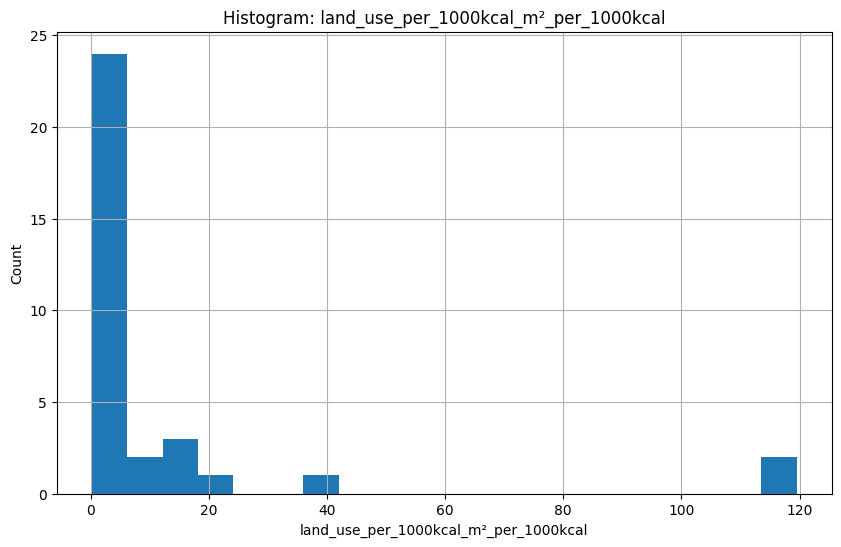

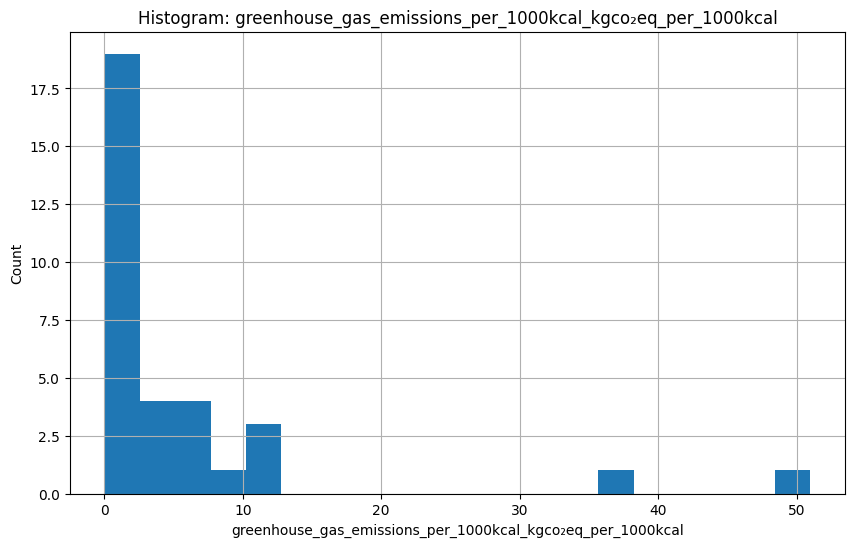

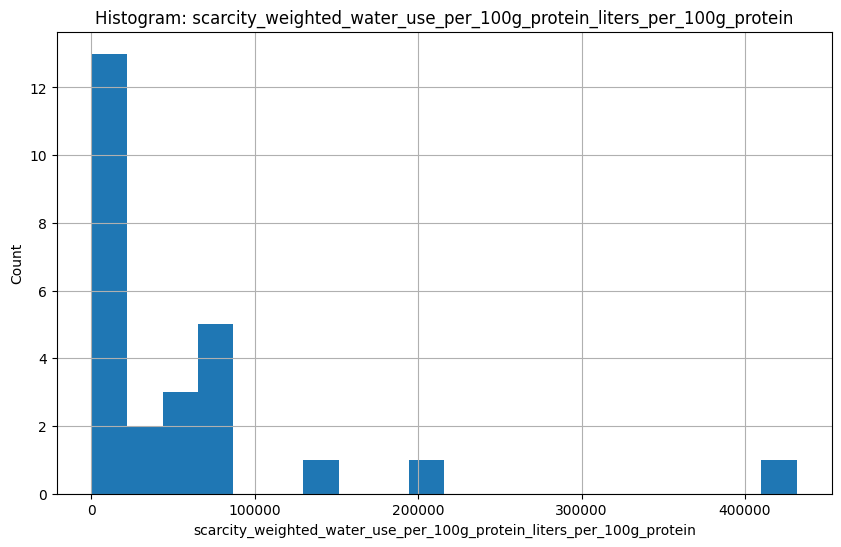

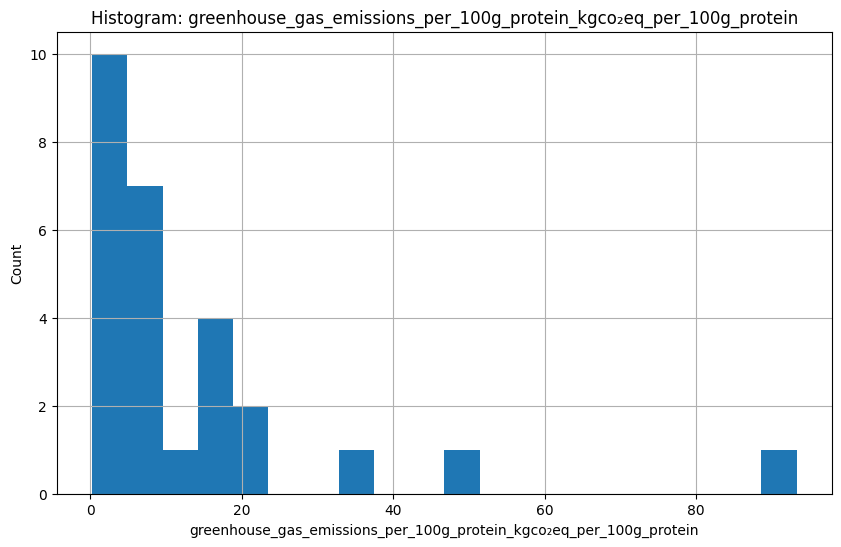

C:\Users\User\AppData\Local\Temp\ipykernel_15432\1976518261.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[c].dropna().values, vert=True, labels=[c])


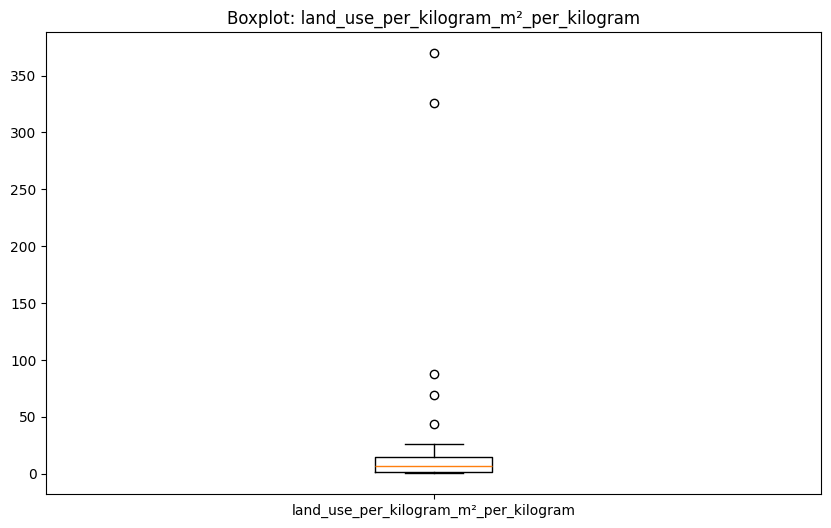

C:\Users\User\AppData\Local\Temp\ipykernel_15432\1976518261.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[c].dropna().values, vert=True, labels=[c])


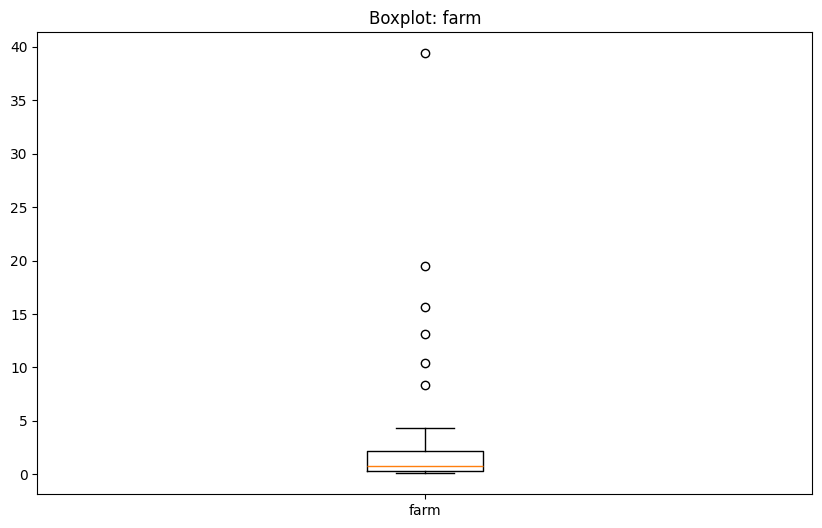

C:\Users\User\AppData\Local\Temp\ipykernel_15432\1976518261.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[c].dropna().values, vert=True, labels=[c])


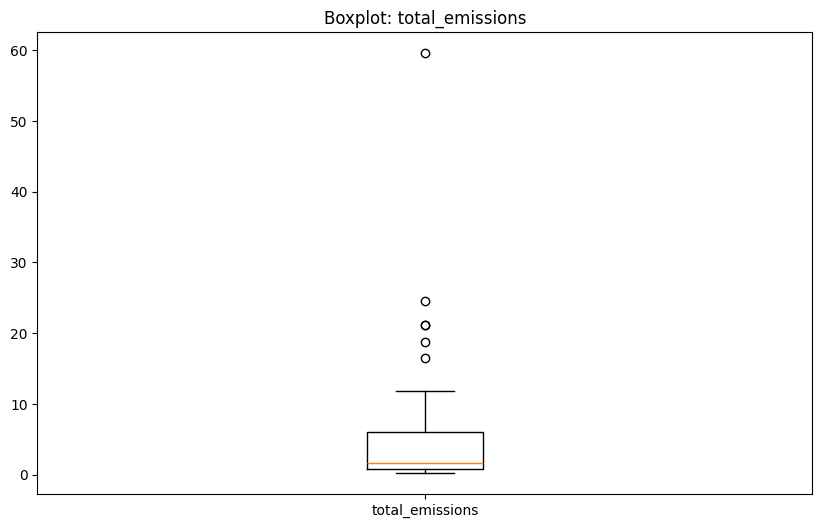

C:\Users\User\AppData\Local\Temp\ipykernel_15432\1976518261.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[c].dropna().values, vert=True, labels=[c])


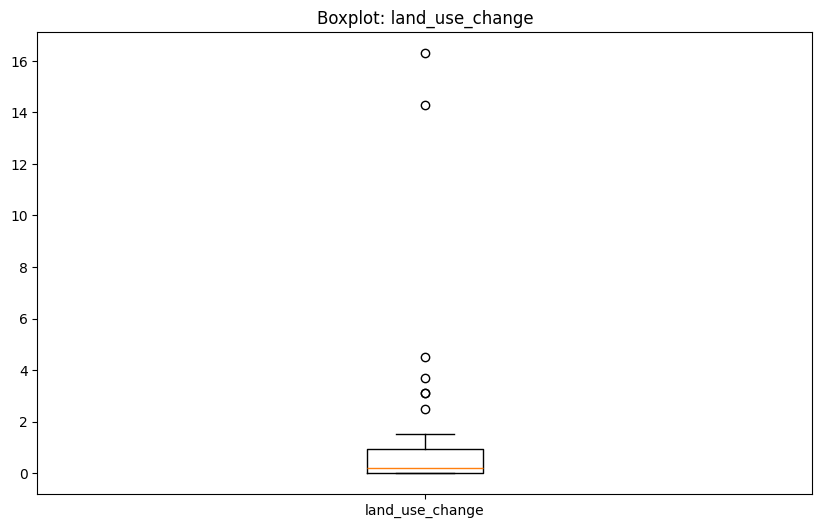

C:\Users\User\AppData\Local\Temp\ipykernel_15432\1976518261.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[c].dropna().values, vert=True, labels=[c])


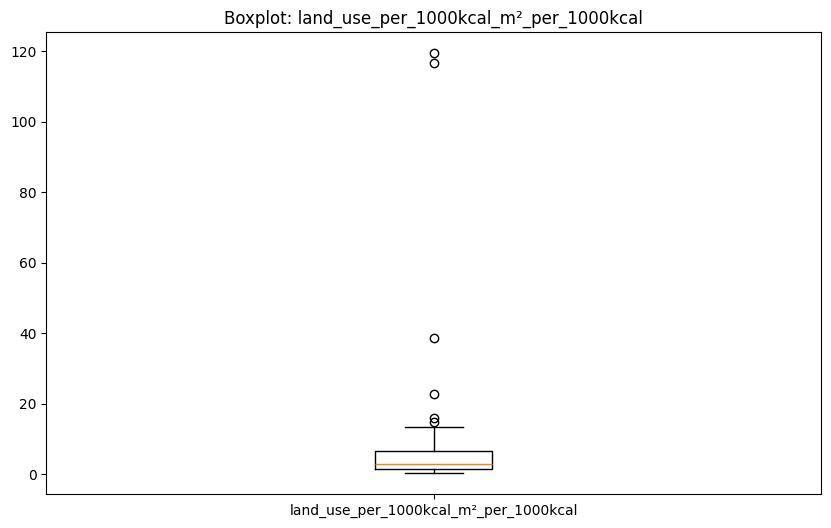

C:\Users\User\AppData\Local\Temp\ipykernel_15432\1976518261.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[c].dropna().values, vert=True, labels=[c])


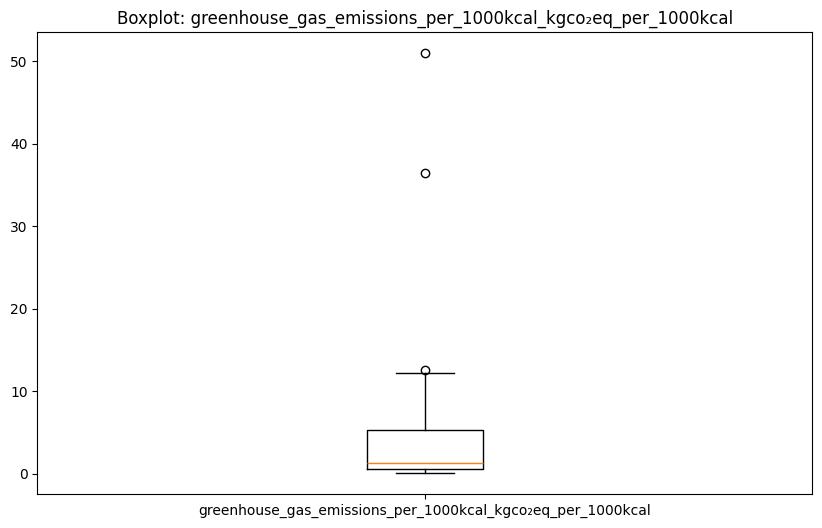

C:\Users\User\AppData\Local\Temp\ipykernel_15432\1976518261.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[c].dropna().values, vert=True, labels=[c])


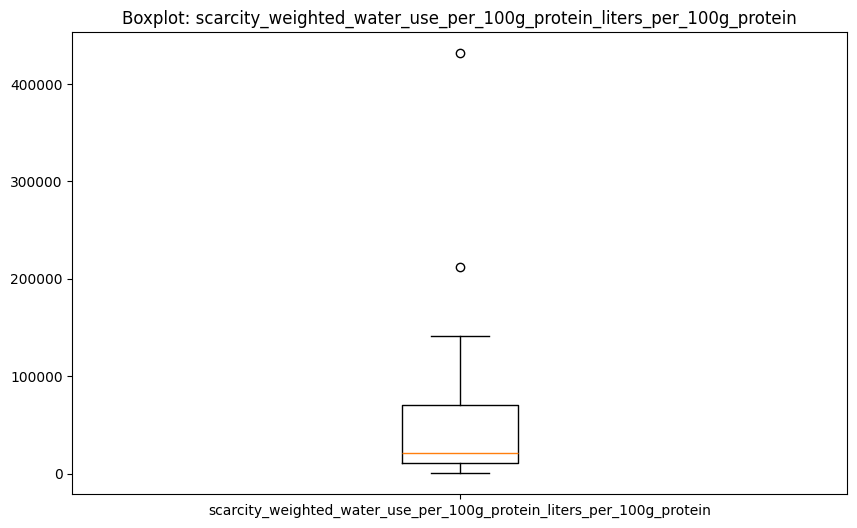

C:\Users\User\AppData\Local\Temp\ipykernel_15432\1976518261.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[c].dropna().values, vert=True, labels=[c])


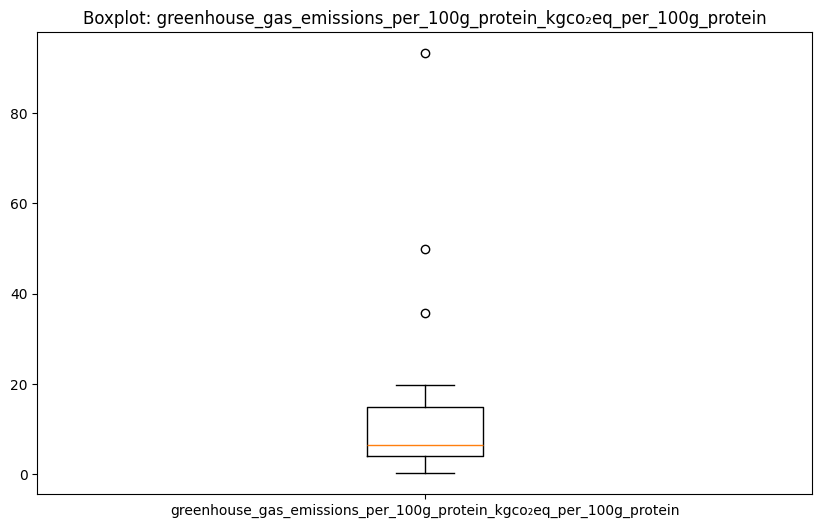

In [27]:
# =========================
# C) Univariate (Numeric)
# =========================
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Summary stats + skew/kurtosis
summary = df[num_cols].describe().T
summary["skew"] = df[num_cols].skew(numeric_only=True)
summary["kurtosis"] = df[num_cols].kurtosis(numeric_only=True)
display(summary.sort_values("skew", ascending=False))

# Plot histograms for the N most skewed columns
N = 8  # adjust
skew_top = summary["skew"].abs().sort_values(ascending=False).head(N).index.tolist()

for c in skew_top:
    plt.figure()
    df[c].dropna().hist(bins=20)
    plt.title(f"Histogram: {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()

# Boxplots for the same columns
for c in skew_top:
    plt.figure()
    plt.boxplot(df[c].dropna().values, vert=True, labels=[c])
    plt.title(f"Boxplot: {c}")
    plt.show()


In [28]:
# --- D. Correlation heatmap------
import re

def short_metric_label(col: str) -> str:
    """
    Return a compact, human-friendly label like:
      'GHG (kgCO2e/kg)', 'Freshwater (L/kg)', 'Land use (m²/100g protein)',
      'Eutroph (gPO4e/1k kcal)', 'Farm (kgCO2e/kg)', 'LUC (kgCO2e/kg)'
    Works on long column names from the food-impact dataset.
    """
    s = str(col)

    # normalize for matching
    low = s.lower().replace("_", " ")

    # metric / stage name
    name = None
    # stages
    if "land use change" in low:      name = "LUC"
    elif "animal feed" in low:        name = "Feed"
    elif re.search(r"\bfarm\b", low): name = "Farm"
    elif "processing" in low:         name = "Proc"
    elif "transport" in low:          name = "Transp"
    elif "packaging" in low:          name = "Pack"
    elif "retail" in low:             name = "Retail"
    # metrics
    elif "greenhouse gas" in low or ("ghg" in low and "emission" in low):
        name = "GHG"
    elif "eutroph" in low:
        name = "Eutroph"
    elif "freshwater withdrawals" in low:
        name = "Freshwater"
    elif "scarcity" in low and "water" in low:
        name = "Scarcity H2O"
    elif "land use" in low:
        name = "Land use"
    elif "total emissions" in low:
        name = "Total emissions"

    # unit token
    unit = None
    if "kgco2" in low or "kg co2" in low or "kgco₂" in low:
        unit = "kgCO2e"
    elif "gpo4" in low or "g po4" in low:
        unit = "gPO4e"
    elif "m2" in low or "m²" in s:
        unit = "m²"
    elif "liter" in low or "litre" in low:
        unit = "L"

    # basis (/kg, /1k kcal, /100g protein)
    if re.search(r"1000\s*kcal|1k\s*kcal", low):
        basis = "/1k kcal"
    elif re.search(r"100\s*g.*protein", low):
        basis = "/100g protein"
    elif re.search(r"\bper\s*kg|\bper\s*kilogram|\b/kg\b|\b perkg\b", low):
        basis = "/kg"
    else:
        basis = ""

    # special case: already short stage names like "Farm"
    if name in {"Farm","Proc","Transp","Pack","Retail","Feed","LUC"}:
        return f"{name} ({unit}{basis})" if unit and basis else (name if not unit else f"{name} ({unit})")

    # fallback metric name if nothing matched
    if name is None:
        # Keep a compact version of the original
        name = re.sub(r"\s+", " ", s).strip().split("(")[0]
        name = name.replace("_"," ").title()

    # build final label
    if unit and basis:
        return f"{name} ({unit}{basis})"
    elif unit:
        return f"{name} ({unit})"
    elif basis:
        return f"{name} {basis}"
    else:
        return name

# Build a mapping once:
SHORT = {c: short_metric_label(c) for c in df.columns}

# Quick peek
import pandas as pd
pd.DataFrame({"original": list(SHORT.keys()), "short": list(SHORT.values())}).head(12)


,original,short
0,food_product,Food Product
1,land_use_change,LUC
2,animal_feed,Feed
3,farm,Farm
4,processing,Proc
5,transport,Transp
6,packging,Packging
7,retail,Retail
8,total_emissions,Total emissions
9,eutrophying_emissions_per_1000kcal_gpo₄eq_per_...,Eutroph /1k kcal


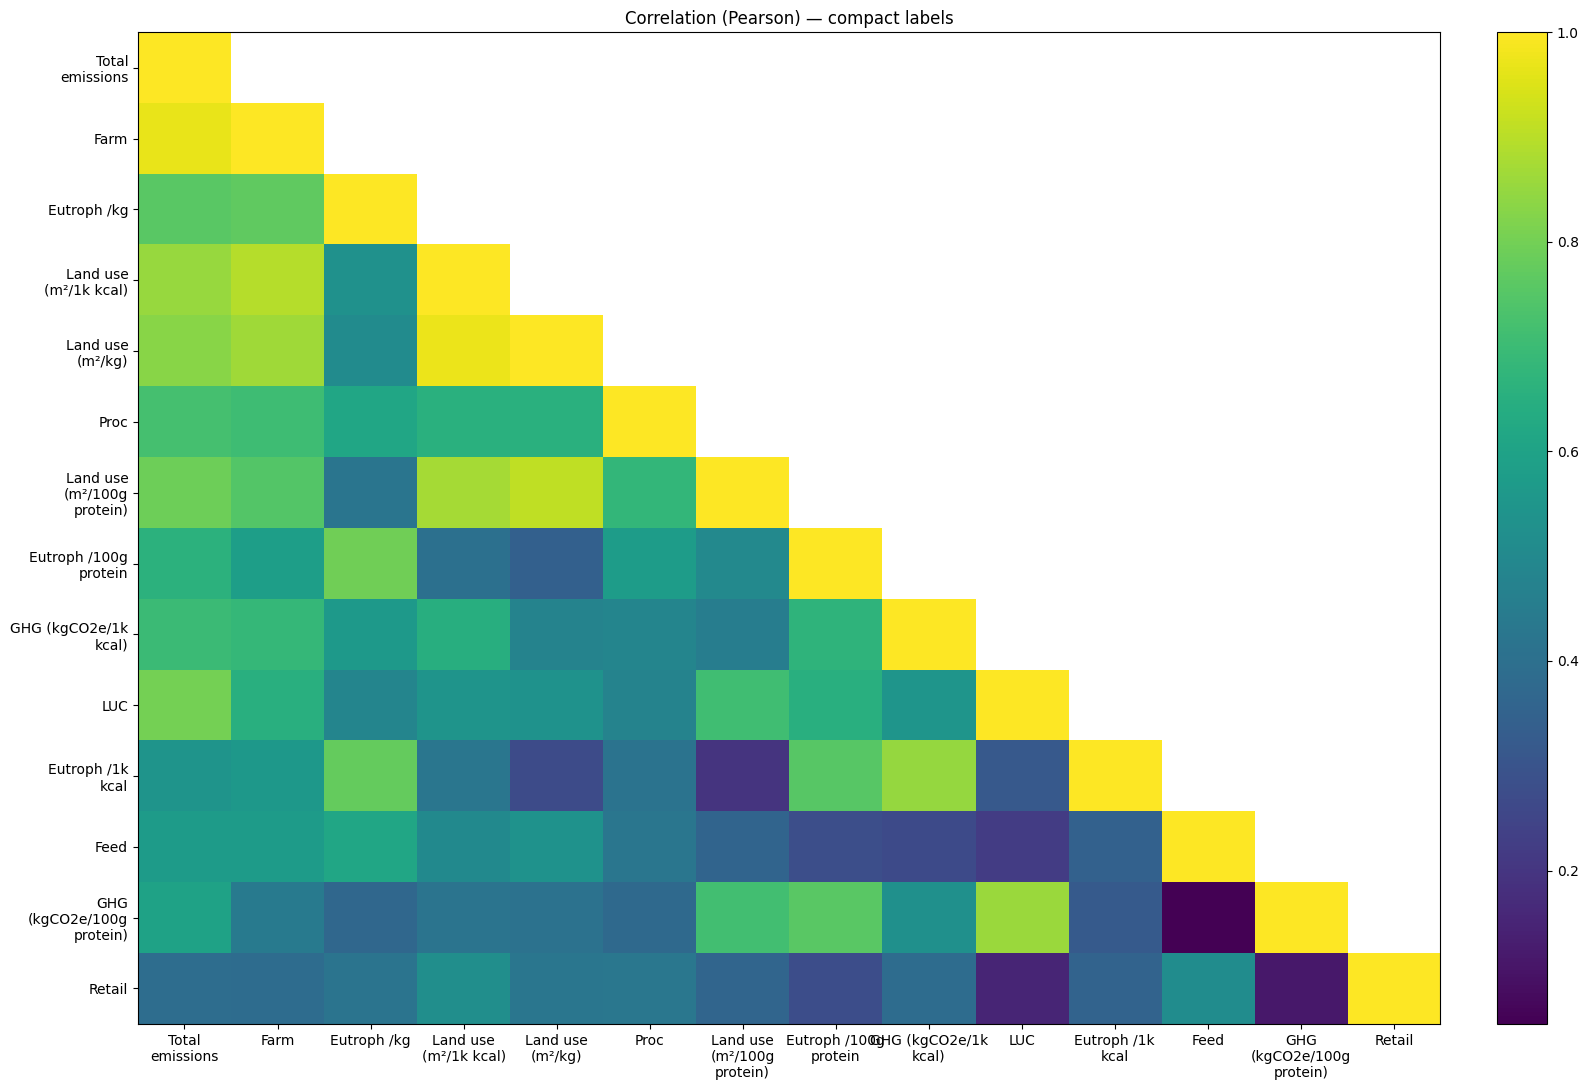

In [29]:
# --- 2) Use short labels in your correlation plot (no data rename needed) ---
import numpy as np
import matplotlib.pyplot as plt
import textwrap

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[num_cols].corr()

# choose top-N by average |corr| to keep readable
N = min(14, len(num_cols))
mean_abs = corr.abs().where(~np.eye(len(corr), dtype=bool)).mean().sort_values(ascending=False)
cols_sel = mean_abs.index[:N].tolist()

# wrapped, shortened labels
def wrap(s, w=14):
    return "\n".join(textwrap.wrap(SHORT.get(s, s), width=w))

xticks = [wrap(c) for c in cols_sel]
yticks = [wrap(c) for c in cols_sel]

# triangular mask
C = corr.loc[cols_sel, cols_sel].values
mask = np.triu(np.ones_like(C, dtype=bool), k=1)
C_masked = np.ma.array(C, mask=mask)

plt.figure(figsize=(16,11))
im = plt.imshow(C_masked, aspect="auto")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(np.arange(len(cols_sel)), xticks, rotation=0)
plt.yticks(np.arange(len(cols_sel)), yticks)
plt.title("Correlation (Pearson) — compact labels")
plt.tight_layout()
plt.show()


In [ ]:
# =========================
# F) Categorical overview
# =========================
# Identify non-numeric (excluding the label); show cardinality & top values
obj_cols = [c for c in df.select_dtypes(include="object").columns if c != LABEL]
card = pd.DataFrame({
    "column": obj_cols,
    "unique": [df[c].nunique(dropna=True) for c in obj_cols]
}).sort_values("unique", ascending=False)
display(card)

# Value counts for small-cardinality columns (<=10)
for c in obj_cols:
    if df[c].nunique(dropna=True) <= 10:
        print(f"\nValue counts: {c}")
        display(df[c].value_counts(dropna=False))


,column,unique
0,food_class,3



Value counts: food_class


food_class
plant      21
unknown    12
animal     10
Name: count, dtype: int64

In [ ]:
# =========================
# G) Outliers (IQR flags)
# =========================
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
iqr_flags = {}

for c in num_cols:
    s = df[c].dropna()
    if s.empty: 
        continue
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    mask = (df[c] < lower) | (df[c] > upper)
    count = int(mask.sum())
    if count:
        iqr_flags[c] = {
            "lower": float(lower), "upper": float(upper), "outliers": count
        }

out_tbl = pd.DataFrame(iqr_flags).T.sort_values("outliers", ascending=False)
display(out_tbl if not out_tbl.empty else pd.DataFrame({"info":["No IQR outliers flagged"]}))


,lower,upper,outliers
animal_feed,0.000000,0.000000,10.0
land_use_change,-1.425000,2.375000,7.0
packging,-0.200000,0.600000,7.0
farm,-2.425000,4.975000,6.0
land_use_per_1000kcal_m²_per_1000kcal,-6.626858,14.544764,6.0
total_emissions,-6.875000,13.725000,6.0
processing,-0.450000,0.750000,5.0
transport,-0.050000,0.350000,5.0
land_use_per_kilogram_m²_per_kilogram,-19.595000,35.625000,5.0
scarcity_weighted_water_use_per_kilogram_liters_per_kilogram,-45627.575000,84912.825000,5.0


###  Answering the Business Questions

In [ ]:

from pathlib import Path
import re, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display  # OK to use for DataFrames; not HTML

plt.rcParams.update({"figure.figsize": (10, 6)})

CLEAN = Path("Food_Production_clean.csv")
RAW   = Path("Food_Production.csv")
PATH  = CLEAN if CLEAN.exists() else RAW

df = pd.read_csv(PATH)

def detect_label(df):
    exact = {"food","food_product","product","item","entity","name"}
    low = {c.lower(): c for c in df.columns}
    for k in exact:
        if k in low: return low[k]
    obj = df.select_dtypes(include="object").columns.tolist()
    return obj[0] if obj else df.columns[0]

LABEL = detect_label(df)
BIZ_TOPN = 10  # adjust list sizes

print("EDA answering 8 business questions (inline)")
print(f"File: {PATH.name} | Label column: {LABEL}")


EDA answering 8 business questions (inline)
File: Food_Production_clean.csv | Label column: food_product


In [ ]:

def detect_cols(cols):
    cols = list(cols)
    f = lambda pat: [c for c in cols if re.search(pat, c, re.I)]
    perkg_total = [c for c in cols if re.search(r"(total|overall).*(co2|co₂|ghg).*(per_?kg|\bkg\b)", c, re.I)]
    if not perkg_total:
        perkg_total = [c for c in cols if re.search(r"(ghg|emission|co2|co₂).*(per_?kg|\bkg\b)", c, re.I) and "1000" not in c and "100 g" not in c.lower()]
    stage_pats = {
        "land_use_change": r"land\s*use\s*change", "animal_feed": r"animal\s*feed", "farm": r"\bfarm\b",
        "processing": r"processing", "transport": r"transport", "packaging": r"packaging", "retail": r"retail"
    }
    stage_cols = {}
    for k, pat in stage_pats.items():
        m = [c for c in cols if re.search(pat, c, re.I) and re.search(r"(co2|co₂|ghg|emission)", c, re.I)]
        stage_cols[k] = m[0] if m else None
    return {
        "ghg_perkg":       perkg_total[:1],
        "ghg_per1kkcal":   f(r"(ghg|emission|co2|co₂).*1000.*kcal")[:1],
        "ghg_per100gprot": f(r"(ghg|emission|co2|co₂).*100\s*g.*protein")[:1],
        "fresh_perkg":     f(r"freshwater\s*withdrawals.*(per_?kg|\bkg\b)")[:1],
        "scarce_perkg":    f(r"scarcity[_\-\s]*weighted\s*water.*(per_?kg|\bkg\b)")[:1],
        "stage_cols":      stage_cols,
    }

DET = detect_cols(df.columns)

def safe_num(s): return pd.to_numeric(s, errors="coerce")

# Ensure ghg_total_perkg exists
if "ghg_total_perkg" not in df.columns and DET["ghg_perkg"]:
    df["ghg_total_perkg"] = safe_num(df[DET["ghg_perkg"][0]])

# Short labels for plotting (non-destructive)
def short_label(col: str) -> str:
    low = str(col).lower().replace("_"," ")
    name = ("LUC" if "land use change" in low else
            "Feed" if "animal feed" in low else
            "Farm" if re.search(r"\bfarm\b", low) else
            "Proc" if "processing" in low else
            "Transp" if "transport" in low else
            "Pack" if "packaging" in low else
            "Retail" if "retail" in low else
            "Eutroph" if "eutroph" in low else
            "Freshwater" if "freshwater withdrawals" in low else
            "Scarcity H2O" if ("scarcity" in low and "water" in low) else
            "GHG" if ("greenhouse gas" in low or "ghg" in low) else
            str(col).split("(")[0].replace("_"," ").title())
    unit = ("kgCO2e" if ("co2" in low) else ("gPO4e" if "po4" in low else ("m²" if "m2" in low or "m²" in col else ("L" if "liter" in low or "litre" in low else ""))))
    if re.search(r"1000.*kcal|1k.*kcal", low): basis="/1k kcal"
    elif re.search(r"100\s*g.*protein", low):  basis="/100g protein"
    elif re.search(r"per\s*kg|\b/kg\b|\bperkg\b", low): basis="/kg"
    else: basis=""
    return f"{name} ({unit}{basis})".strip() if unit or basis else name

SHORT = {c: short_label(c) for c in df.columns}

def wrap(s, w=16): return "\n".join(textwrap.wrap(SHORT.get(s, s), width=w))

def savefig(path):
    plt.tight_layout(); plt.savefig(path, dpi=200, bbox_inches="tight"); plt.close()


In [ ]:
# Short labels & small helpers (no HTML)
def short_label(col: str) -> str:
    low = str(col).lower().replace("_"," ")
    name = ("LUC" if "land use change" in low else
            "Feed" if "animal feed" in low else
            "Farm" if re.search(r"\bfarm\b", low) else
            "Proc" if "processing" in low else
            "Transp" if "transport" in low else
            "Pack" if "packaging" in low else
            "Retail" if "retail" in low else
            "Eutroph" if "eutroph" in low else
            "Freshwater" if "freshwater withdrawals" in low else
            "Scarcity H2O" if ("scarcity" in low and "water" in low) else
            "GHG" if ("greenhouse gas" in low or "ghg" in low) else
            str(col).split("(")[0].replace("_"," ").title())
    unit = ("kgCO2e" if ("co2" in low) else
            ("gPO4e" if "po4" in low else
             ("m²" if "m2" in low or "m²" in col else
              ("L" if "liter" in low or "litre" in low else ""))))
    if re.search(r"1000.*kcal|1k.*kcal", low): basis="/1k kcal"
    elif re.search(r"100\s*g.*protein", low):  basis="/100g protein"
    elif re.search(r"per\s*kg|\b/kg\b|\bperkg\b", low): basis="/kg"
    else: basis=""
    return f"{name} ({unit}{basis})".strip() if unit or basis else name

SHORT = {c: short_label(c) for c in df.columns}

print("Short label preview (first 8):")
preview = pd.DataFrame({"original": list(SHORT.keys())[:8],
                        "short": [SHORT[c] for c in list(SHORT.keys())[:8]]})
display(preview)

def barh_from_table(tbl, label, valcol, xlabel, title):
    plt.figure()
    plt.barh(tbl[label][::-1], tbl[valcol][::-1])
    plt.xlabel(xlabel); plt.title(title)
    plt.tight_layout(); plt.show()


Short label preview (first 8):


,original,short
0,food_product,Food Product
1,land_use_change,LUC
2,animal_feed,Feed
3,farm,Farm
4,processing,Proc
5,transport,Transp
6,packging,Packging
7,retail,Retail


In [ ]:
# --- PATCH: robust GHG detection & fallback total, with diagnostics ---

import re
import numpy as np
import pandas as pd

def detect_cols_robust(cols):
    cols = list(cols)
    f = lambda pat: [c for c in cols if re.search(pat, c, re.I)]

    # 1) Try to find an explicit total GHG per kg
    perkg_total = []
    # common names in OWID-style data
    perkg_total += f(r"(greenhouse|total)\s*(gas\s*)?emissions.*per\s*kg")
    perkg_total += f(r"(greenhouse|total)\s*(gas\s*)?emissions.*per_?kilogram")
    perkg_total += f(r"ghg.*per\s*kg")
    perkg_total += f(r"kgco2e.*per\s*kg")
    perkg_total += f(r"total_emissions.*per.*kg")
    perkg_total = list(dict.fromkeys(perkg_total))  # unique, preserve order

    # 2) Also accept a generic "total emissions" if no per-kg wording appears
    if not perkg_total:
        perkg_total = f(r"^total[_\s]*emissions$")
        perkg_total += f(r"^total[_\s]*emissions.*(kg|kgco2|co2|co₂)")
        perkg_total = list(dict.fromkeys(perkg_total))

    # 3) Find stage columns (don’t require the word "emissions"; OWID stage names often omit it)
    stage_names = {
        "land_use_change": r"land\s*use\s*change",
        "animal_feed": r"animal\s*feed",
        "farm": r"\bfarm\b",
        "processing": r"processing",
        "transport": r"transport",
        "packaging": r"packaging",
        "retail": r"retail",
    }
    stage_cols = {}
    for k, pat in stage_names.items():
        m = [c for c in cols if re.search(pat, c, re.I) and not re.search(r"1000\s*kcal|100\s*g.*protein", c, re.I)]
        stage_cols[k] = m[0] if m else None

    return {
        "ghg_perkg_candidates": perkg_total,
        "stage_cols": stage_cols,
        "fresh_perkg": f(r"freshwater.*withdrawals.*(per[_\s]*kg|per[_\s]*kilogram)"),
        "scarce_perkg": f(r"scarcity[_\-\s]*weighted.*water.*(per[_\s]*kg|per[_\s]*kilogram)"),
    }

# Re-detect with robust logic
DET2 = detect_cols_robust(df.columns)

def safe_num(s): return pd.to_numeric(s, errors="coerce")

# Build/repair ghg_total_perkg
ghg_candidates = DET2["ghg_perkg_candidates"]
stage_cols_found = [c for c in DET2["stage_cols"].values() if c and c in df.columns]

made_total = False
if "ghg_total_perkg" in df.columns:
    # ensure numeric
    df["ghg_total_perkg"] = safe_num(df["ghg_total_perkg"])
elif ghg_candidates:
    cand = next((c for c in ghg_candidates if c in df.columns), None)
    if cand is not None:
        df["ghg_total_perkg"] = safe_num(df[cand])
        made_total = True
elif stage_cols_found:
    # sum stages as fallback
    df["ghg_total_perkg"] = safe_num(df[stage_cols_found]).sum(axis=1, min_count=1)
    made_total = True

# Diagnostics
non_null = int(df["ghg_total_perkg"].notna().sum()) if "ghg_total_perkg" in df.columns else 0
print("\n[Diagnostics] GHG per kg status")
print(" - Selected total column:",
      "ghg_total_perkg" if "ghg_total_perkg" in df.columns else "None")
print(" - Built from:", ("STAGES" if made_total and stage_cols_found else
                         ghg_candidates[0] if (made_total and ghg_candidates) else "N/A"))
print(" - Non-null rows:", non_null)
print(" - Stage columns found:", [c for c in stage_cols_found])

# Optional: also refresh DET items used later
fresh_candidates  = [c for c in (DET2["fresh_perkg"] or []) if c in df.columns]
scarce_candidates = [c for c in (DET2["scarce_perkg"] or []) if c in df.columns]
if fresh_candidates:  print(" - Freshwater per kg:", fresh_candidates[0])
if scarce_candidates: print(" - Scarcity-weighted per kg:", scarce_candidates[0])



[Diagnostics] GHG per kg status
 - Selected total column: ghg_total_perkg
 - Built from: N/A
 - Non-null rows: 0
 - Stage columns found: ['farm', 'processing', 'transport', 'retail']
 - Freshwater per kg: freshwater_withdrawals_per_kilogram_liters_per_kilogram
 - Scarcity-weighted per kg: scarcity_weighted_water_use_per_kilogram_liters_per_kilogram


In [ ]:
# Replace your bar helper with this safer version:
def barh_from_table(tbl, label, valcol, xlabel, title):
    if tbl is None or tbl.empty:
        print(f"[skip plot] No rows for: {title}")
        return
    plt.figure()
    plt.barh(tbl[label][::-1], tbl[valcol][::-1])
    plt.xlabel(xlabel); plt.title(title)
    plt.tight_layout(); plt.show()


### Q1. Highest/lowest GHG foods (per kg, per 1k kcal, per 100g protein)

Q1. Highest/lowest GHG foods (per kg / per 1k kcal / per 100g protein)
[skip plot] No data for: Top — GHG (/kg)
[skip plot] No data for: Bottom — GHG (/kg)


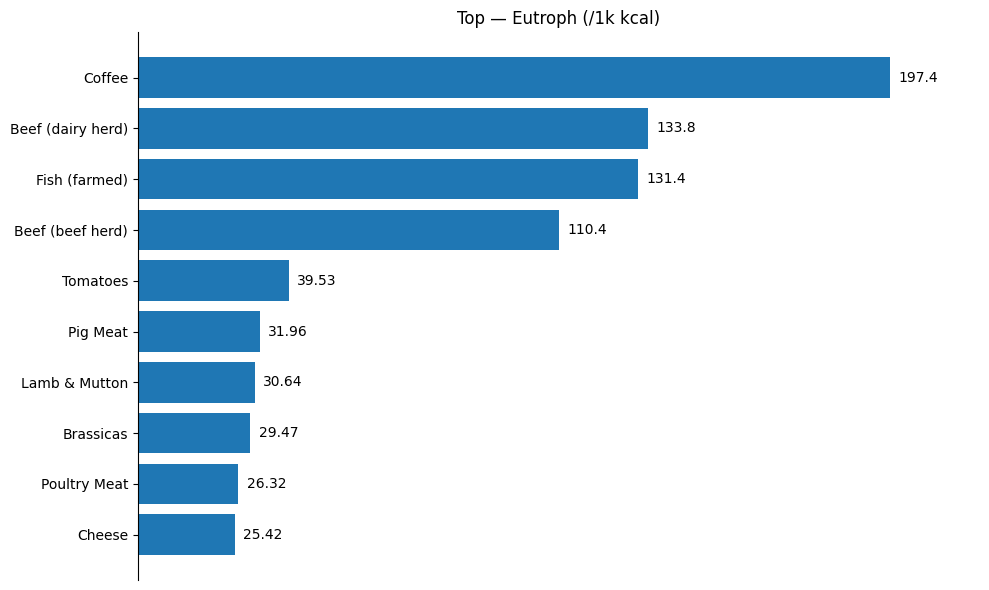

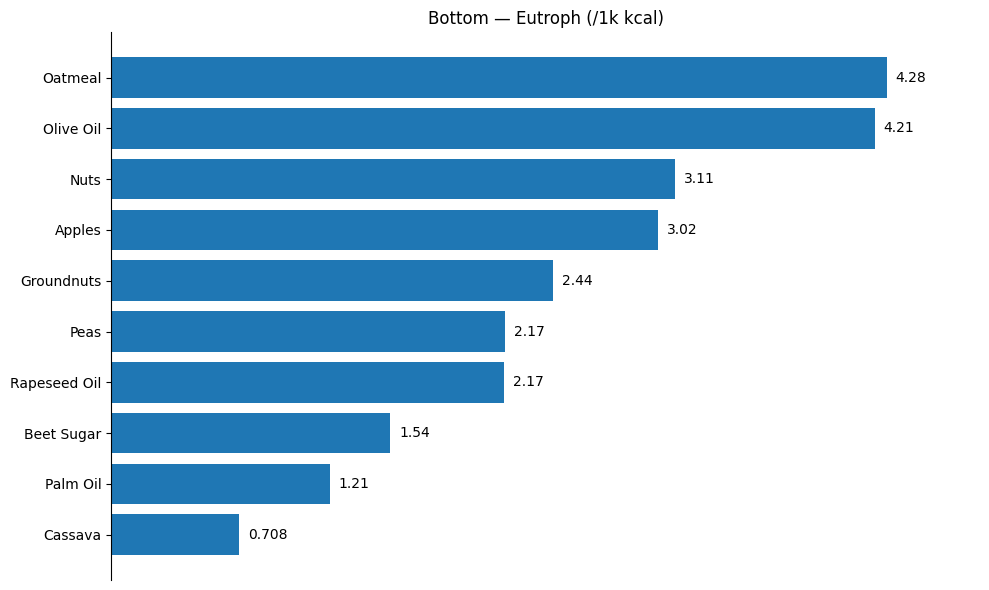

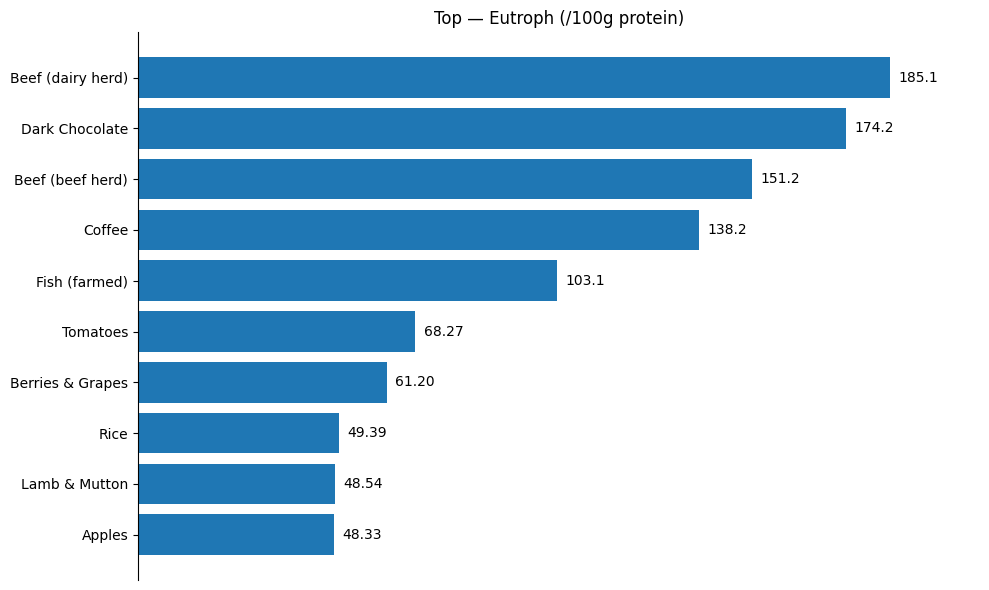

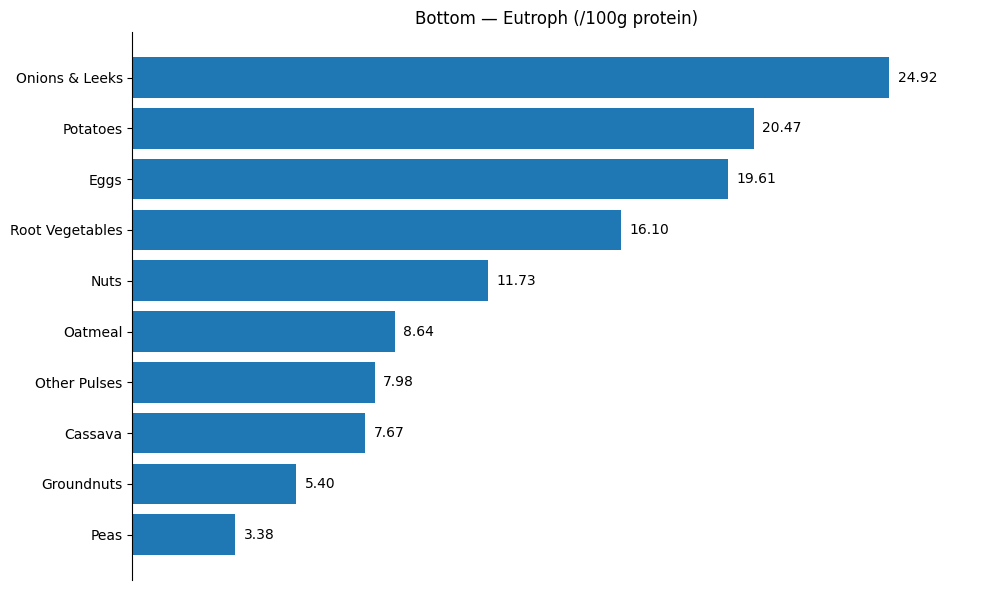

In [ ]:

print("Q1. Highest/lowest GHG foods (per kg / per 1k kcal / per 100g protein)")

def top_bottom(df, label, col, n=BIZ_TOPN):
    t = df[[label, col]].copy()
    t[col] = safe_num(t[col])
    t = t.dropna()
    top = t.sort_values(col, ascending=False).head(n).reset_index(drop=True)
    low = t.sort_values(col, ascending=True).head(n).reset_index(drop=True)
    return top, low

def fmt_num(x):
    if x is None or (isinstance(x, float) and not np.isfinite(x)):
        return ""
    ax = abs(x)
    if ax >= 1000:   return f"{x:,.0f}"
    if ax >= 100:    return f"{x:,.1f}"
    if ax >= 1:      return f"{x:.2f}"
    if ax >= 0.01:   return f"{x:.3f}"
    return f"{x:.2e}"

def barh_annotated_no_numaxis(tbl, label, valcol, title):
    if tbl is None or tbl.empty:
        print(f"[skip plot] No data for: {title}")
        return

    # Sort for nice ordering
    tbl = tbl.sort_values(valcol, ascending=False)
    labels = tbl[label].astype(str).tolist()[::-1]
    values = tbl[valcol].values[::-1]

    # Compute axis limits with a little room for the text
    vmin = min(0, float(np.min(values)))  # baseline at 0
    vmax = float(np.max(values)) * 1.12 if len(values) else 1.0

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(labels, values)

    # Hide numeric axis (x) entirely
    ax.set_xlim(vmin, vmax)
    ax.xaxis.set_visible(False)
    for spine in ["top", "right", "bottom"]:
        ax.spines[spine].set_visible(False)

    # Annotate numeric values at end of bars
    pad = (vmax - vmin) * 0.01
    for y, v in enumerate(values):
        ax.text(v + pad, y, fmt_num(v), va="center")

    ax.set_title(title)
    plt.tight_layout()
    plt.show()

basis = {
    "per kg":            "ghg_total_perkg" if "ghg_total_perkg" in df.columns else None,
    "per 1k kcal":       DET["ghg_per1kkcal"][0]   if DET["ghg_per1kkcal"]   else None,
    "per 100g protein":  DET["ghg_per100gprot"][0] if DET["ghg_per100gprot"] else None,
}

for basis_name, col in basis.items():
    if not col:
        print(f"- {basis_name}: missing column; skipped.")
        continue

    top, low = top_bottom(df, LABEL, col, n=BIZ_TOPN)

    # Top N chart
    barh_annotated_no_numaxis(
        top, LABEL, col,
        f"Top — {SHORT.get(col, col)}"
    )

    # Bottom N chart
    barh_annotated_no_numaxis(
        low, LABEL, col,
        f"Bottom — {SHORT.get(col, col)}"
    )


### Q2: Dominant lifecycle stages (shares)

Q2. Dominant lifecycle stages (shares)

[Diagnostics] Stage columns detected:
 - land_use_change : 'land_use_change'  | non-null: 39
 - animal_feed     : 'animal_feed'  | non-null: 43
 - farm            : 'farm'  | non-null: 43
 - processing      : 'processing'  | non-null: 43
 - transport       : 'transport'  | non-null: 43
 - packaging       : None  | non-null: 0
 - retail          : 'retail'  | non-null: 43

[Info] Built 'ghg_total_perkg' by summing stages.
[Diagnostics] 'ghg_total_perkg' non-null rows: 43


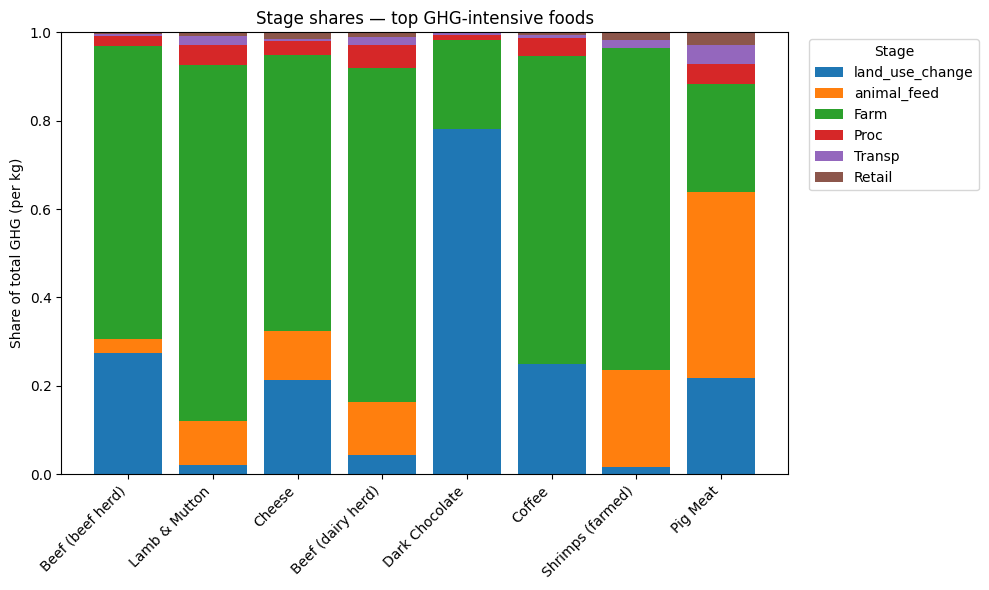

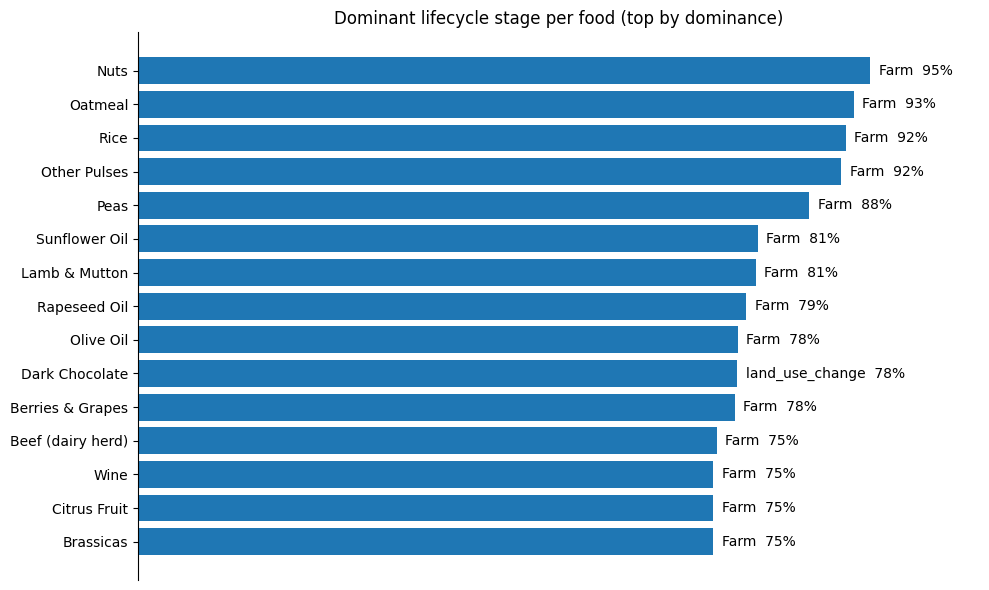

In [ ]:
# Q2 — Dominant lifecycle stages (robust detect + diagnostics + plots) — FIXED
import re, numpy as np, pandas as pd
import matplotlib.pyplot as plt

print("Q2. Dominant lifecycle stages (shares)")

# --- utils ---
def safe_num(s):
    return pd.to_numeric(s, errors="coerce")

def safe_num_df(df_sub: pd.DataFrame) -> pd.DataFrame:
    """Column-wise numeric coercion for DataFrames."""
    return df_sub.apply(pd.to_numeric, errors="coerce")

def normalize_colname(c: str) -> str:
    s = re.sub(r"[^\w\s]", "", c.lower()).replace("_", " ")
    return re.sub(r"[^a-z]", "", s)

def guess_stage_columns(df: pd.DataFrame) -> dict:
    norm = {c: normalize_colname(c) for c in df.columns}
    def is_numeric_col(col):
        s = safe_num(df[col])
        return s.notna().sum() > 0

    keys = {
        "land_use_change": lambda s: ("land" in s and "use" in s and "change" in s),
        "animal_feed":    lambda s: ("feed" in s),
        "farm":           lambda s: ("farm" in s),
        "processing":     lambda s: ("process" in s),
        "transport":      lambda s: ("transport" in s or "freight" in s),
        "packaging":      lambda s: ("packag" in s),
        "retail":         lambda s: ("retail" in s),
    }

    stage_cols = {}
    for key, pred in keys.items():
        matches = [c for c, n in norm.items() if pred(n)]
        prefer = [c for c in matches if re.search(r"(co2|co₂|ghg|emiss)", c, re.I)]
        col = next((c for c in prefer if is_numeric_col(c)), None)
        if not col:
            col = next((c for c in matches if is_numeric_col(c)), None)
        stage_cols[key] = col
    return stage_cols

def short_stage(col: str) -> str:
    if col is None: return "n/a"
    low = col.lower()
    if "land use change" in low: return "LUC"
    if "animal feed" in low:     return "Feed"
    if re.search(r"\bfarm\b", low): return "Farm"
    if "processing" in low:      return "Proc"
    if "transport" in low:       return "Transp"
    if "packaging" in low:       return "Pack"
    if "retail" in low:          return "Retail"
    return col.split("(")[0].strip()

# --- detect stages ---
stage_cols_map = guess_stage_columns(df)
stage_cols = [c for c in stage_cols_map.values() if c is not None]

print("\n[Diagnostics] Stage columns detected:")
for k, v in stage_cols_map.items():
    nn = int(safe_num(df[v]).notna().sum()) if v else 0
    print(f" - {k:16s}: {v!r}  | non-null: {nn}")

# --- ensure ghg_total_perkg: BUILD USING COLUMN-WISE COERCION ---
if "ghg_total_perkg" not in df.columns or safe_num(df["ghg_total_perkg"]).notna().sum() == 0:
    if stage_cols:
        df["ghg_total_perkg"] = safe_num_df(df[stage_cols]).sum(axis=1, min_count=1)  # <-- FIX HERE
        print("\n[Info] Built 'ghg_total_perkg' by summing stages.")
    else:
        print("\n[Error] No stage columns and no 'ghg_total_perkg'. Cannot plot Q2.")
        raise SystemExit

df["ghg_total_perkg"] = safe_num(df["ghg_total_perkg"])
non_null_total = int(df["ghg_total_perkg"].notna().sum())
print(f"[Diagnostics] 'ghg_total_perkg' non-null rows: {non_null_total}")

if non_null_total == 0 or len(stage_cols) == 0:
    print("[Stop] Nothing to plot for Q2 (no totals or no stage columns).")
else:
    # ---------- A) Stacked stage shares for top emitters ----------
    TOPN = 8
    temp = df[[LABEL, "ghg_total_perkg"] + stage_cols].copy()
    temp["ghg_total_perkg"] = safe_num(temp["ghg_total_perkg"])
    temp[stage_cols] = safe_num_df(temp[stage_cols])  # <-- ALSO FIX HERE

    temp = temp.dropna(subset=["ghg_total_perkg"])
    stage_sum = temp[stage_cols].fillna(0).sum(axis=1)
    temp = temp.loc[stage_sum > 0]
    if temp.empty:
        print("[Stop] Stage data are all zero/NaN — cannot compute shares.")
    else:
        top_emit = temp.sort_values("ghg_total_perkg", ascending=False).head(TOPN)
        denom = top_emit["ghg_total_perkg"].replace({0: np.nan})
        shares = pd.DataFrame({LABEL: top_emit[LABEL]})
        for c in stage_cols:
            shares[c] = top_emit[c] / denom

        fig, ax = plt.subplots(figsize=(10, 6))
        bottom = np.zeros(len(shares))
        x = np.arange(len(shares[LABEL]))
        for c in stage_cols:
            vals = shares[c].fillna(0).values
            ax.bar(x, vals, bottom=bottom, label=short_stage(c))
            bottom += vals
        ax.set_xticks(x, [str(v) for v in shares[LABEL]], rotation=45, ha="right")
        ax.set_ylabel("Share of total GHG (per kg)")
        ax.set_title("Stage shares — top GHG-intensive foods")
        ax.legend(title="Stage", bbox_to_anchor=(1.02, 1), loc="upper left")
        plt.tight_layout()
        plt.show()

        # ---------- B) Dominant stage per food (annotated; numeric axis hidden) ----------
        denom_all = temp["ghg_total_perkg"].replace({0: np.nan})
        all_shares = temp[[LABEL] + stage_cols].copy()
        all_shares[stage_cols] = all_shares[stage_cols].div(denom_all, axis=0)

        dom_idx = all_shares[stage_cols].idxmax(axis=1)
        dom_share = all_shares[stage_cols].max(axis=1)

        dom = pd.DataFrame({
            LABEL: temp[LABEL].values,
            "dom_stage": [short_stage(s) for s in dom_idx.values],
            "dom_share": dom_share.values
        }).dropna().sort_values("dom_share", ascending=False).head(15)

        if dom.empty:
            print("[Note] No dominant-stage rows computed (all NaN?).")
        else:
            labels = dom[LABEL].astype(str).tolist()[::-1]
            values = dom["dom_share"].values[::-1]
            stages = dom["dom_stage"].tolist()[::-1]

            fig, ax = plt.subplots(figsize=(10, 6))
            ax.barh(labels, values)
            ax.set_xlim(0, max(values)*1.15 if len(values) else 1.0)
            ax.xaxis.set_visible(False)
            for spine in ["top", "right", "bottom"]:
                ax.spines[spine].set_visible(False)

            pad = (ax.get_xlim()[1]) * 0.01
            for y, (v, s) in enumerate(zip(values, stages)):
                ax.text(v + pad, y, f"{s}  {v:.0%}", va="center")

            ax.set_title("Dominant lifecycle stage per food (top by dominance)")
            plt.tight_layout()
            plt.show()


### Q3: Animal vs plant medians

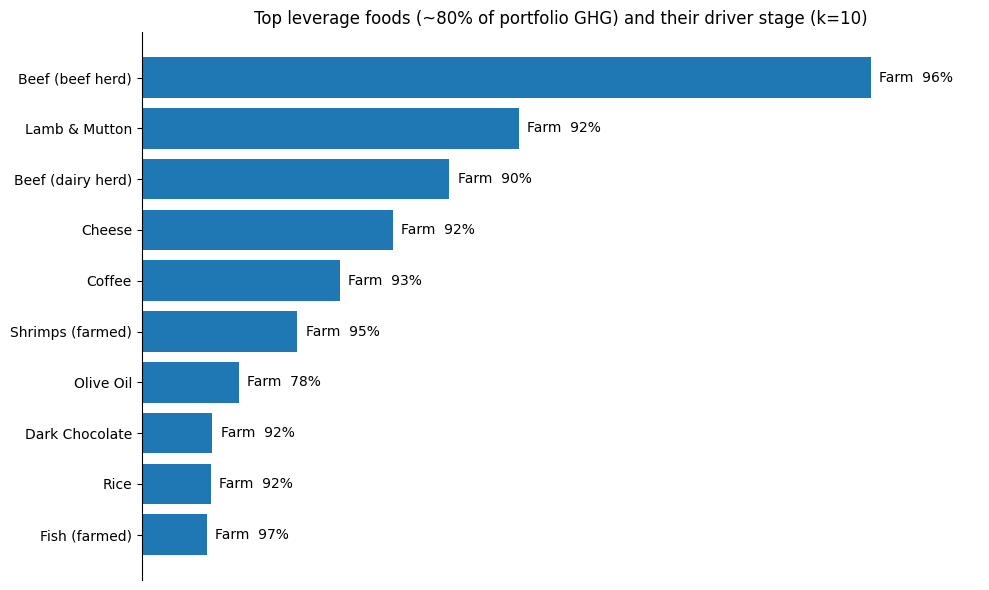

In [34]:
# Pareto + Driver Stage — FIXED (dtype-safe merge, label not coerced to numeric)
import re, numpy as np, pandas as pd
import matplotlib.pyplot as plt

TARGET = 0.80  # 80% target

# ---- helpers ----
def safe_num(s): return pd.to_numeric(s, errors="coerce")
def safe_num_cols(df_in: pd.DataFrame, cols: list) -> pd.DataFrame:
    out = df_in.copy()
    out[cols] = out[cols].apply(pd.to_numeric, errors="coerce")
    return out

def guess_stage_columns(df: pd.DataFrame) -> list:
    pats = [r"land\s*use\s*change", r"animal\s*feed", r"\bfarm\b", r"processing", r"transport", r"packaging", r"retail"]
    cols = []
    for pat in pats:
        m = [c for c in df.columns if re.search(pat, c, re.I)]
        if m: cols.append(m[0])
    return cols

def short_stage(name: str) -> str:
    if name is None: return "n/a"
    low = name.lower()
    if "land use change" in low: return "LUC"
    if "animal feed" in low:     return "Feed"
    if re.search(r"\bfarm\b",low): return "Farm"
    if "processing" in low:      return "Proc"
    if "transport" in low:       return "Transp"
    if "packaging" in low:       return "Pack"
    if "retail" in low:          return "Retail"
    return name.split("(")[0].strip()

# ---- ensure total GHG/kg exists (or build from stages) ----
stage_cols = guess_stage_columns(df)
if "ghg_total_perkg" not in df.columns or safe_num(df["ghg_total_perkg"]).notna().sum() == 0:
    if stage_cols:
        tmp_stages = safe_num_cols(df[stage_cols], stage_cols)
        df["ghg_total_perkg"] = tmp_stages.sum(axis=1, min_count=1)
    else:
        raise RuntimeError("Need 'ghg_total_perkg' or stage columns to compute Pareto.")
df["ghg_total_perkg"] = safe_num(df["ghg_total_perkg"])

# ---- weights (equal by default) ----
weights = pd.Series(np.ones(len(df)) / len(df), index=df[LABEL].astype(str))

# ---- contributions & Pareto ----
tmp = pd.DataFrame({
    LABEL: df[LABEL].astype(str),
    "ghg_perkg": df["ghg_total_perkg"]
}).dropna(subset=["ghg_perkg"])

tmp["weight"] = weights.reindex(tmp[LABEL]).fillna(0.0).values
tmp["weighted_ghg"] = tmp["ghg_perkg"] * tmp["weight"]
tmp = tmp.sort_values("weighted_ghg", ascending=False).reset_index(drop=True)

total = tmp["weighted_ghg"].sum()
if total <= 0 or tmp.empty:
    raise RuntimeError("No positive weighted contributions.")

tmp["cum_share"] = tmp["weighted_ghg"].cumsum() / total

reach_idx = int(np.argmax(tmp["cum_share"].values >= TARGET)) if (tmp["cum_share"] >= TARGET).any() else len(tmp)-1
k = reach_idx + 1
# clamp to 8–10 when possible, but don't exceed available rows
if len(tmp) >= 8:
    k = min(max(k, 8), min(10, len(tmp)))
top_set = tmp.head(k).copy()

# ---- dominant stage per food (dtype-safe merge) ----
dom_stage = pd.Series(index=top_set.index, dtype=object)
dom_share = pd.Series(index=top_set.index, dtype=float)

if stage_cols:
    stage_df = df[[LABEL] + stage_cols].copy()
    stage_df[LABEL] = stage_df[LABEL].astype(str)         # keep as string
    stage_df = safe_num_cols(stage_df, stage_cols)         # only convert stage cols

    merged = top_set[[LABEL, "ghg_perkg"]].copy()
    merged[LABEL] = merged[LABEL].astype(str)              # match dtype
    merged = merged.merge(stage_df, on=LABEL, how="left")

    denom = merged["ghg_perkg"].replace({0: np.nan})
    shares = merged[stage_cols].div(denom, axis=0)

    idxmax = shares.idxmax(axis=1)
    maxval = shares.max(axis=1)
    dom_stage = idxmax.map(short_stage)
    dom_share = maxval.fillna(0.0)
else:
    dom_stage[:] = "n/a"; dom_share[:] = np.nan

levers = top_set.assign(dom_stage=dom_stage.values, dom_share=dom_share.values)

# ---- plot (barh, stage+%, hide numeric axis) ----
labels = levers[LABEL].astype(str).tolist()[::-1]
vals   = levers["weighted_ghg"].values[::-1]
stg    = levers["dom_stage"].astype(str).tolist()[::-1]
stgsh  = levers["dom_share"].values[::-1]

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(labels, vals)

ax.set_xlim(0, (vals.max() if len(vals) else 1.0) * 1.15)
ax.xaxis.set_visible(False)
for spine in ["top","right","bottom"]:
    ax.spines[spine].set_visible(False)

pad = ax.get_xlim()[1] * 0.01
for y, (v, s, p) in enumerate(zip(vals, stg, stgsh)):
    txt = f"{s}  {p:.0%}" if np.isfinite(p) else f"{s}"
    ax.text(v + pad, y, txt, va="center")

ax.set_title(f"Top leverage foods (~80% of portfolio GHG) and their driver stage (k={len(levers)})")
plt.tight_layout()
plt.show()




### Q4: Water risk: which foods have extreme scarcity-weighted water use, and where do withdrawals cluster?

Q4. Water risk — extremes & clustering
Detected -> scarcity: 'scarcity_weighted_water_use_per_100g_protein_liters_per_100g_protein' [/100g protein], freshwater: 'freshwater_withdrawals_per_100g_protein_liters_per_100g_protein' [/100g protein]


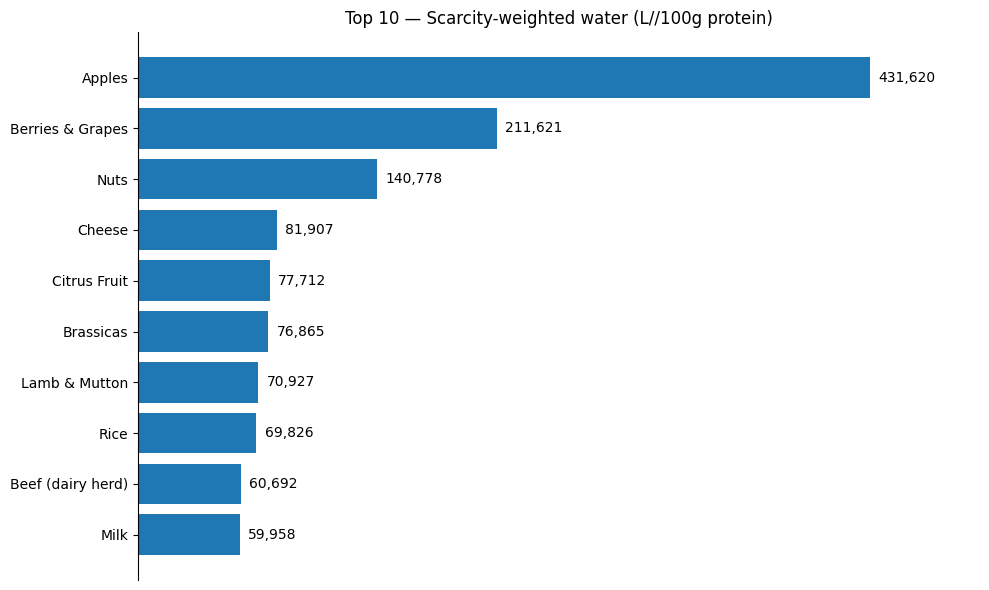

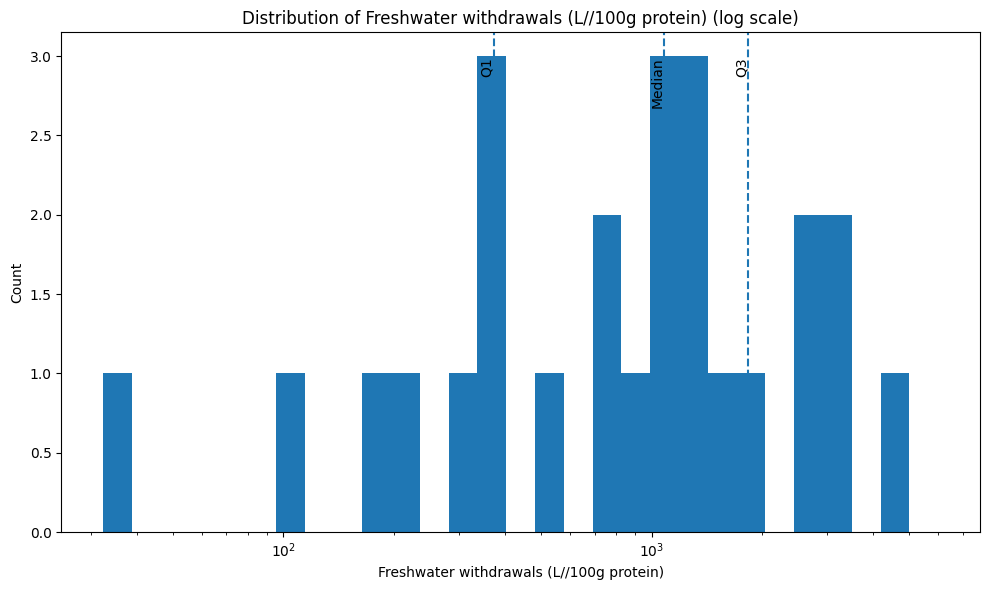

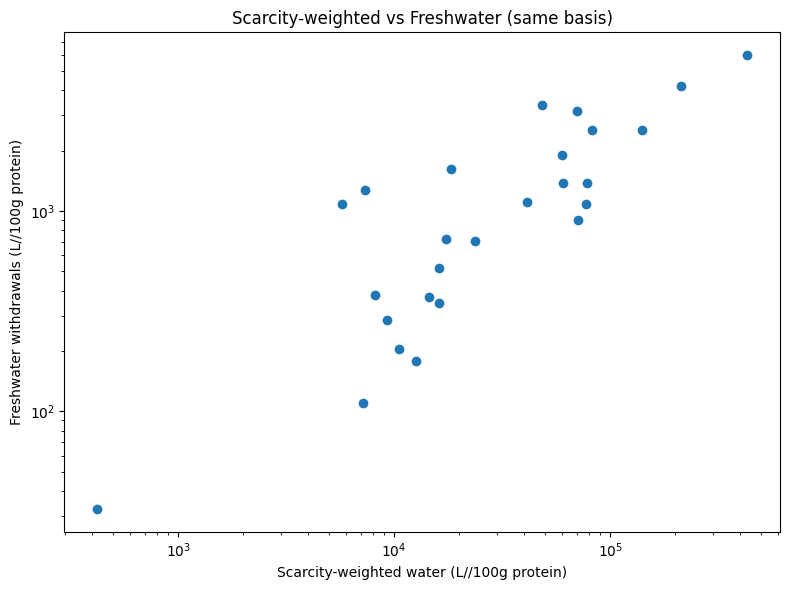

In [41]:

import re, numpy as np, pandas as pd
import matplotlib.pyplot as plt

print("Q4. Water risk — extremes & clustering")

BIZ_TOPN = globals().get("BIZ_TOPN", 10)

def safe_num(s): return pd.to_numeric(s, errors="coerce")

def norm(s: str) -> str:
    s = s.lower().replace("_"," ").replace("-"," ")
    s = re.sub(r"[^\w\s]", " ", s)
    return re.sub(r"\s+"," ", s).strip()

def find_best_water(df):
    cols = list(df.columns)
    nc = {c: norm(c) for c in cols}

    def pick(token_sets):
        for basis, toks in token_sets:
            for c,n in nc.items():
                if all(t in n for t in toks):
                    return c, basis
        return None, None

    # prefer per-kg; fallback to /100g protein; then /1k kcal
    scarce_col, scarce_basis = pick([
        ("per kg",       ["scarcity","water","per","kg"]),
        ("/100g protein",["scarcity","water","100","g","protein"]),
        ("/1k kcal",     ["scarcity","water","1000","kcal"])
    ])
    fresh_col, fresh_basis = pick([
        ("per kg",       ["fresh","water","withdraw","per","kg"]),
        ("/100g protein",["fresh","water","withdraw","100","g","protein"]),
        ("/1k kcal",     ["fresh","water","withdraw","1000","kcal"])
    ])
    return (scarce_col, scarce_basis), (fresh_col, fresh_basis)

def label_for(col, basis):
    if col is None: return "n/a"
    n = norm(col)
    if "scarcity" in n: base = "Scarcity-weighted water"
    elif "fresh" in n:  base = "Freshwater withdrawals"
    else: base = col
    unit = "L"  # OWID uses liters; adjust if your file differs
    return f"{base} ({unit}{'/' + basis if basis else ''})"

def fmt_num(x):
    ax = abs(float(x))
    if ax >= 1000: return f"{x:,.0f}"
    if ax >= 100:  return f"{x:,.1f}"
    if ax >= 1:    return f"{x:.2f}"
    if ax >= 0.01: return f"{x:.3f}"
    return f"{x:.2e}"

def barh_annotated_no_numaxis(names, values, title):
    if not values: 
        print(f"[skip plot] {title} — no data"); return
    order = np.argsort(values)[::-1]
    labels = [names[i] for i in order][::-1]
    vals   = [values[i] for i in order][::-1]
    fig, ax = plt.subplots(figsize=(10,6))
    ax.barh(labels, vals)
    vmax = max(vals); ax.set_xlim(0, vmax*1.15)
    ax.xaxis.set_visible(False)
    for s in ["top","right","bottom"]: ax.spines[s].set_visible(False)
    pad = ax.get_xlim()[1]*0.01
    for y,v in enumerate(vals): ax.text(v+pad, y, fmt_num(v), va="center")
    ax.set_title(title); plt.tight_layout(); plt.show()

# ---- detect water columns (with fallbacks)
(scarce_col, scarce_basis), (fresh_col, fresh_basis) = find_best_water(df)
print(f"Detected -> scarcity: {scarce_col!r} [{scarce_basis}], freshwater: {fresh_col!r} [{fresh_basis}]")

# ---- A) Extremes in scarcity-weighted water
if scarce_col and scarce_col in df.columns:
    s = df[[LABEL, scarce_col]].copy()
    s[scarce_col] = safe_num(s[scarce_col])
    s = s.dropna(subset=[scarce_col])
    if not s.empty:
        top = s.sort_values(scarce_col, ascending=False).head(BIZ_TOPN)
        barh_annotated_no_numaxis(
            top[LABEL].astype(str).tolist(),
            top[scarce_col].astype(float).tolist(),
            f"Top {BIZ_TOPN} — {label_for(scarce_col, scarce_basis)}"
        )
    else:
        print("[skip plot] Scarcity column present but not numeric.")
else:
    print("No scarcity-weighted water column found (any basis).")

# ---- B) Where do withdrawals cluster? (histogram, log x)
if fresh_col and fresh_col in df.columns:
    w = safe_num(df[fresh_col]); w = w[(~w.isna()) & (w > 0)]
    if not w.empty:
        lo, hi = np.log10(w.min()), np.log10(w.max())
        bins = np.logspace(lo, hi, 30) if np.isfinite(lo) and np.isfinite(hi) and hi>lo else 20
        fig, ax = plt.subplots(figsize=(10,6))
        ax.hist(w, bins=bins); ax.set_xscale("log")
        ax.set_ylabel("Count"); ax.set_xlabel(label_for(fresh_col, fresh_basis))
        ax.set_title(f"Distribution of {label_for(fresh_col, fresh_basis)} (log scale)")
        q1, med, q3 = np.quantile(w, [0.25, 0.5, 0.75])
        for q,lbl in [(q1,"Q1"),(med,"Median"),(q3,"Q3")]:
            ax.axvline(q, linestyle="--"); ax.text(q, ax.get_ylim()[1]*0.95, lbl, rotation=90, va="top", ha="right")
        plt.tight_layout(); plt.show()
    else:
        print("[skip plot] Freshwater column present but has no positive values.")
else:
    print("No freshwater withdrawals column found (any basis).")

# ---- C) Optional scatter (if both exist on same basis)
if scarce_col and fresh_col:
    xs = safe_num(df[scarce_col]); ys = safe_num(df[fresh_col])
    m = xs.notna() & ys.notna() & (xs>0) & (ys>0)
    if m.sum() > 1:
        fig, ax = plt.subplots(figsize=(8,6))
        ax.scatter(xs[m], ys[m]); ax.set_xscale("log"); ax.set_yscale("log")
        ax.set_xlabel(label_for(scarce_col, scarce_basis))
        ax.set_ylabel(label_for(fresh_col, fresh_basis))
        ax.set_title("Scarcity-weighted vs Freshwater (same basis)")
        plt.tight_layout(); plt.show()


#### Q5: Dietary swaps: what realistic substitutions (e.g., beef → poultry/legumes; dairy → plant milks) yield the largest impact reduction per serving of protein/kcal?

Q5. Dietary swaps — impact reduction per serving
Detected columns → per 100g protein: 'eutrophying_emissions_per_100g_protein_gpo₄eq_per_100_grams_protein', per 1k kcal: 'eutrophying_emissions_per_1000kcal_gpo₄eq_per_1000kcal'


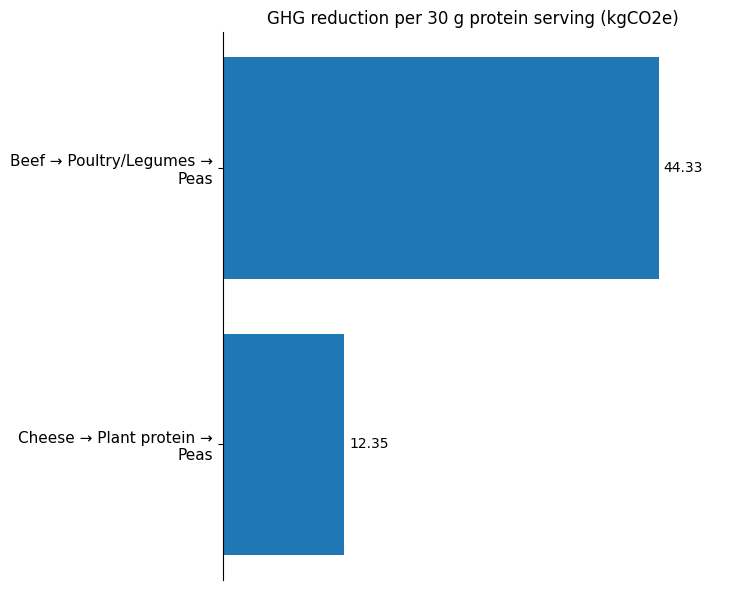

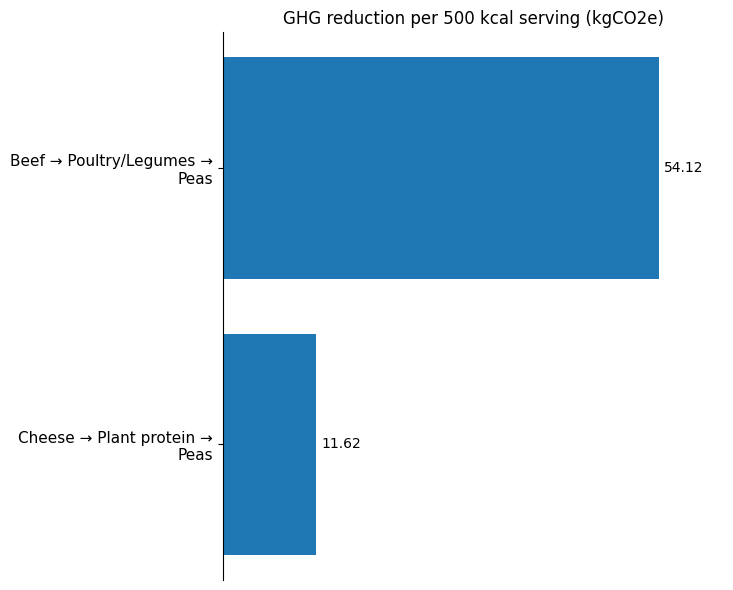

In [42]:


import re, textwrap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Q5. Dietary swaps — impact reduction per serving")

# ---------- setup ----------
def safe_num(s):
    return pd.to_numeric(s, errors="coerce")

def detect_label(df):
    exact = {"food","food_product","product","item","entity","name"}
    low = {c.lower(): c for c in df.columns}
    for k in exact:
        if k in low: return low[k]
    obj = df.select_dtypes(include="object").columns.tolist()
    return obj[0] if obj else df.columns[0]

if "LABEL" not in globals():
    LABEL = detect_label(df)

# ---------- find required columns ----------
def find_cols(cols):
    cols = list(cols)
    # GHG per 100 g protein
    per100p = next((c for c in cols if re.search(r"(ghg|emission|co2|co₂).*100\s*g.*protein", c, re.I)), None)
    if per100p is None:
        per100p = next((c for c in cols if re.search(r"(100\s*g.*protein).*(ghg|emission|co2|co₂)", c, re.I)), None)
    # GHG per 1000 kcal
    per1kk  = next((c for c in cols if re.search(r"(ghg|emission|co2|co₂).*1000.*kcal", c, re.I)), None)
    if per1kk is None:
        per1kk = next((c for c in cols if re.search(r"(1000.*kcal).*(ghg|emission|co2|co₂)", c, re.I)), None)
    return per100p, per1kk

col_per100p, col_per1kk = find_cols(df.columns)
print(f"Detected columns → per 100g protein: {col_per100p!r}, per 1k kcal: {col_per1kk!r}")

# ---------- helpers ----------
def has_kw(x, kws):
    s = str(x).lower()
    return any(k in s for k in kws)

def pick_best(df, label_col, col, include_kws, exclude_kws=None):
    """Return the *lowest* intensity median row matching include_kws (and not exclude_kws)."""
    if col is None or col not in df.columns:
        return None
    mask = df[label_col].map(lambda x: has_kw(x, include_kws))
    if exclude_kws:
        mask &= ~df[label_col].map(lambda x: has_kw(x, exclude_kws))
    t = df.loc[mask, [label_col, col]].copy()
    t[col] = safe_num(t[col])
    t = t.dropna(subset=[col])
    if t.empty:
        return None
    g = t.groupby(label_col, as_index=False)[col].median().sort_values(col, ascending=True)
    return g.iloc[0].to_dict()  # {label_col: name, col: value}

def barh_annotated_no_numaxis(names, values, title, wrap_at=28, fontsize=11, left=None):
    """Horizontal bars with value labels; wraps long y labels; hides numeric x-axis."""
    if not values:
        print(f"[skip plot] {title} — no data")
        return
    order = np.argsort(values)[::-1]
    labels = [names[i] for i in order][::-1]
    vals   = [values[i] for i in order][::-1]

    # wrap long labels
    labels_wrapped = [
        "\n".join(textwrap.wrap(s, width=wrap_at)) if wrap_at and len(s) > wrap_at else s
        for s in labels
    ]

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.barh(labels_wrapped, vals)

    # hide numeric axis
    vmax = max(vals) if len(vals) else 1.0
    ax.set_xlim(0, vmax * 1.15)
    ax.xaxis.set_visible(False)
    for s in ["top","right","bottom"]:
        ax.spines[s].set_visible(False)
    ax.tick_params(axis="y", labelsize=fontsize)

    # annotate values
    pad = ax.get_xlim()[1] * 0.01
    for y, v in enumerate(vals):
        ax.text(v + pad, y, f"{v:.2f}", va="center")

    ax.set_title(title)

    # auto left margin so labels don't clip
    if left is None:
        max_lines = max(lbl.count("\n") + 1 for lbl in labels_wrapped)
        max_chars = max(len(line) for lbl in labels_wrapped for line in lbl.split("\n"))
        left = min(0.45, 0.12 + 0.01 * max_chars + 0.02 * (max_lines - 1))
    fig.subplots_adjust(left=left)
    plt.tight_layout(rect=(left, 0, 1, 1))
    plt.show()

# ---------- serving definitions ----------
SERV_PROT = 0.30   # 30 g protein -> multiplier on "per 100 g protein"
SERV_KCAL = 0.50   # 500 kcal     -> multiplier on "per 1000 kcal"

# ---------- define swap intents ----------
swaps = [
    # red meat to poultry/legumes
    {"name":"Beef → Poultry/Legumes",
     "src_kws":["beef","lamb","mutton"],
     "tgt_pools":[["chicken","poultry","turkey"], ["tofu","soy","pea","lentil","bean","legume"]]},
    {"name":"Pork → Poultry/Legumes",
     "src_kws":["pork"],
     "tgt_pools":[["chicken","poultry","turkey"], ["tofu","soy","pea","lentil","bean","legume"]]},
    # dairy to plant milks
    {"name":"Dairy milk → Plant milk",
     "src_kws":["milk"],
     "tgt_pools":[["soy milk","soymilk","oat milk","almond milk","rice milk","plant milk"]],
     "exclude_src":["chocolate","dark chocolate","cheese","butter"]},
    # cheese to plant proteins
    {"name":"Cheese → Plant protein",
    "src_kws":["cheese"],
    "tgt_pools":[["tofu","soy","pea","lentil","bean","legume"]]},
    # shrimp to fish/poultry
    {"name":"Shrimp → Fish/Poultry",
     "src_kws":["shrimp","prawn"],
     "tgt_pools":[["fish","tilapia","carp","herring","cod"], ["chicken","poultry","turkey"]]},
]

# ---------- compute reductions ----------
results_prot, results_kcal = [], []

for sw in swaps:
    src_kws = sw["src_kws"]; tgt_pools = sw["tgt_pools"]; excl = sw.get("exclude_src", [])
    for basis, col, mult, bucket in [
        ("per 100g protein", col_per100p, SERV_PROT, results_prot),
        ("per 1k kcal",      col_per1kk,  SERV_KCAL, results_kcal),
    ]:
        if col is None:
            continue

        # source median across all matched items
        src_mask = df[LABEL].map(lambda x: has_kw(x, src_kws))
        if excl:
            src_mask &= ~df[LABEL].map(lambda x: has_kw(x, excl))
        src_vals = safe_num(df.loc[src_mask, col])
        src_med = float(src_vals.median()) if src_vals.notna().any() else np.nan

        # best (lowest) target across all pools
        best_tgt = None
        for pool in tgt_pools:
            cand = pick_best(df, LABEL, col, include_kws=pool)
            if cand is None:
                continue
            if (best_tgt is None) or (cand[col] < best_tgt[col]):
                best_tgt = cand

        if np.isnan(src_med) or best_tgt is None:
            continue

        reduction = (src_med - float(best_tgt[col])) * mult
        bucket.append({
            "swap": sw["name"],
            "basis": basis,
            "src_med": src_med,
            "tgt_item": best_tgt[LABEL],
            "tgt_val": float(best_tgt[col]),
            "reduction_per_serving": max(0.0, reduction)  # floor negatives at 0
        })

# ---------- plots ----------
if results_prot:
    names = [f"{r['swap']} → {r['tgt_item']}" for r in results_prot]
    vals  = [r["reduction_per_serving"] for r in results_prot]
    barh_annotated_no_numaxis(names, vals, "GHG reduction per 30 g protein serving (kgCO2e)")

if results_kcal:
    names = [f"{r['swap']} → {r['tgt_item']}" for r in results_kcal]
    vals  = [r["reduction_per_serving"] for r in results_kcal]
    barh_annotated_no_numaxis(names, vals, "GHG reduction per 500 kcal serving (kgCO2e)")

if not results_prot and not results_kcal:
    print("[Note] Could not find suitable columns or matches for swaps in this dataset.")
    print("Inspect candidates:", [c for c in df.columns if re.search(r'protein|kcal', c, re.I)])


#### Q6:Transport & packaging sensitivity: for which foods are these stages non-trivial (i.e., >10–15%)?

Q6. Transport & packaging sensitivity (≥ threshold)
Detected columns → transport: 'transport', packaging: None


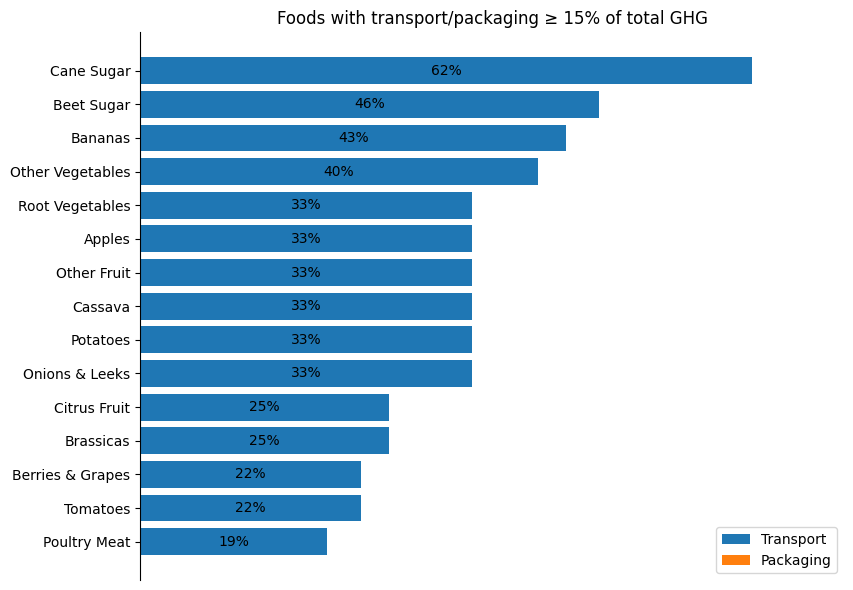

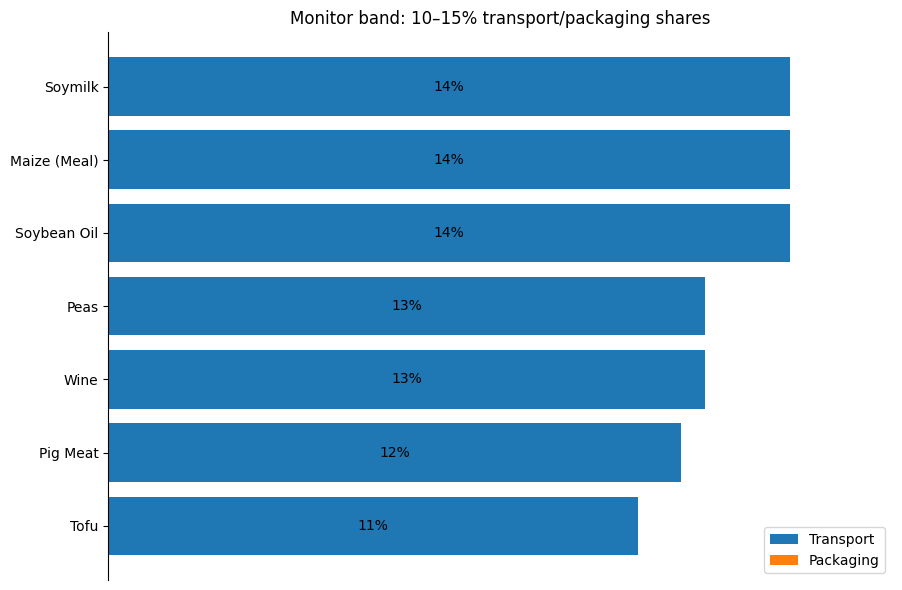

Summary: 15 foods ≥ 15%; 7 foods in 10–15% band.


In [43]:


import re, textwrap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Q6. Transport & packaging sensitivity (≥ threshold)")

# -------- configuration --------
THRESH_MAIN   = 0.15   # main threshold (15%)
THRESH_MON_LO = 0.10   # optional monitor band lower bound (10%)
THRESH_MON_HI = 0.15   # monitor band upper bound (15%)
MAXN = 20              # max items to display

# -------- helpers --------
def safe_num(s): return pd.to_numeric(s, errors="coerce")
def safe_num_cols(df_in: pd.DataFrame, cols: list) -> pd.DataFrame:
    out = df_in.copy()
    out[cols] = out[cols].apply(pd.to_numeric, errors="coerce")
    return out

def norm(s: str) -> str:
    s = s.lower().replace("_"," ").replace("-"," ")
    s = re.sub(r"[^\w\s]", " ", s)
    return re.sub(r"\s+"," ", s).strip()

def detect_label(df):
    exact = {"food","food_product","product","item","entity","name"}
    low = {c.lower(): c for c in df.columns}
    for k in exact:
        if k in low: return low[k]
    obj = df.select_dtypes(include="object").columns.tolist()
    return obj[0] if obj else df.columns[0]

if "LABEL" not in globals():
    LABEL = detect_label(df)

def guess_stage_columns(df: pd.DataFrame) -> dict:
    """Return best-guess columns for stages (may be None)."""
    nc = {c: norm(c) for c in df.columns}
    def pick(token):
        # prefer columns that look like emissions (ghg/co2/emiss), else any numeric
        prefer = [c for c,n in nc.items() if token in n and re.search(r"(ghg|co2|co₂|emiss)", n)]
        pool   = prefer + [c for c,n in nc.items() if token in n and c not in prefer]
        for c in pool:
            if safe_num(df[c]).notna().sum() > 0:
                # avoid kcal/protein bases
                if not re.search(r"(1000\s*kcal|100\s*g\s*protein)", nc[c]):
                    return c
        return None

    return {
        "land_use_change": pick("land use change"),
        "animal_feed":     pick("animal feed"),
        "farm":            pick("farm"),
        "processing":      pick("processing"),
        "transport":       pick("transport"),
        "packaging":       pick("packaging"),
        "retail":          pick("retail"),
    }

def barh_tp_stacked(names, transport, packaging, title, wrap_at=28):
    """Stacked horizontal bars (transport + packaging), labels wrapped, numeric x-axis hidden."""
    if len(names) == 0:
        print(f"[skip plot] {title} — no items"); return

    comb = (np.array(transport) + np.array(packaging))
    order = np.argsort(comb)[::-1]
    names = [names[i] for i in order][:MAXN]
    transport = [float(transport[i]) for i in order][:MAXN]
    packaging = [float(packaging[i]) for i in order][:MAXN]

    labels_wrapped = [
        "\n".join(textwrap.wrap(s, width=wrap_at)) if wrap_at and len(s) > wrap_at else s
        for s in names[::-1]
    ]
    t_vals = np.array(transport[::-1])
    p_vals = np.array(packaging[::-1])

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.barh(labels_wrapped, t_vals, label="Transport")
    ax.barh(labels_wrapped, p_vals, left=t_vals, label="Packaging")

    # hide numeric axis
    xmax = max((t_vals + p_vals).max(), 0.01)
    ax.set_xlim(0, float(xmax) * 1.15)
    ax.xaxis.set_visible(False)
    for s in ["top","right","bottom"]:
        ax.spines[s].set_visible(False)

    # annotate percentages (inside segment if big enough, else at segment end)
    total = t_vals + p_vals
    pad = ax.get_xlim()[1] * 0.01
    for y in range(len(labels_wrapped)):
        if t_vals[y] > 0.03:
            ax.text(t_vals[y]/2, y, f"{t_vals[y]:.0%}", va="center", ha="center")
        elif t_vals[y] > 0:
            ax.text(t_vals[y] + pad, y, f"{t_vals[y]:.0%}", va="center", ha="left")
        if p_vals[y] > 0.03:
            ax.text(t_vals[y] + p_vals[y]/2, y, f"{p_vals[y]:.0%}", va="center", ha="center")
        elif p_vals[y] > 0:
            ax.text(t_vals[y] + p_vals[y] + pad, y, f"{p_vals[y]:.0%}", va="center", ha="left")

    ax.legend(loc="lower right")
    ax.set_title(title)

    # auto left margin so labels don't clip
    max_lines = max(lbl.count("\n") + 1 for lbl in labels_wrapped)
    max_chars = max(len(line) for lbl in labels_wrapped for line in lbl.split("\n"))
    left = min(0.45, 0.12 + 0.01 * max_chars + 0.02 * (max_lines - 1))
    fig.subplots_adjust(left=left)
    plt.tight_layout(rect=(left, 0, 1, 1))
    plt.show()

# -------- detect stages & totals --------
stages = guess_stage_columns(df)
t_col = stages.get("transport")
p_col = stages.get("packaging")
stage_cols_present = [c for c in stages.values() if c]

print(f"Detected columns → transport: {t_col!r}, packaging: {p_col!r}")

# ensure a total per-kg exists; if not, build by summing stages we found
if "ghg_total_perkg" not in df.columns or safe_num(df["ghg_total_perkg"]).notna().sum() == 0:
    if stage_cols_present:
        df["ghg_total_perkg"] = safe_num_cols(df[stage_cols_present], stage_cols_present).sum(axis=1, min_count=1)
        print("[info] Built ghg_total_perkg by summing detected stages.")
    else:
        print("[stop] No total GHG or stage columns found."); raise SystemExit

denom = safe_num(df["ghg_total_perkg"]).replace({0: np.nan})

# compute shares
shares = pd.DataFrame({LABEL: df[LABEL].astype(str)})
if t_col: shares["transport_share"] = safe_num(df[t_col]) / denom
if p_col: shares["packaging_share"] = safe_num(df[p_col]) / denom

# flag items
tp_cols = [c for c in ["transport_share", "packaging_share"] if c in shares.columns]
if not tp_cols:
    print("[stop] Neither transport nor packaging columns found after detection."); raise SystemExit

shares["tp_sum"] = shares[tp_cols].fillna(0).sum(axis=1)
shares["tp_max"] = shares[tp_cols].max(axis=1)

main = shares[(shares[tp_cols] > THRESH_MAIN).any(axis=1)].copy()
monitor = shares[(shares["tp_max"] >= THRESH_MON_LO) & (shares["tp_max"] < THRESH_MON_HI)].copy()

# -------- plots --------
if not main.empty:
    names = main[LABEL].tolist()
    transp = main["transport_share"].fillna(0).tolist() if "transport_share" in main else [0]*len(main)
    packg  = main["packaging_share"].fillna(0).tolist() if "packaging_share" in main else [0]*len(main)
    barh_tp_stacked(names, transp, packg,
        title=f"Foods with transport/packaging ≥ {int(THRESH_MAIN*100)}% of total GHG")
else:
    print(f"[note] No foods exceed {int(THRESH_MAIN*100)}% in transport or packaging share.")

if not monitor.empty:
    names = monitor[LABEL].tolist()
    transp = monitor["transport_share"].fillna(0).tolist() if "transport_share" in monitor else [0]*len(monitor)
    packg  = monitor["packaging_share"].fillna(0).tolist() if "packaging_share" in monitor else [0]*len(monitor)
    barh_tp_stacked(names, transp, packg,
        title=f"Monitor band: {int(THRESH_MON_LO*100)}–{int(THRESH_MON_HI*100)}% transport/packaging shares")
else:
    print(f"[note] No foods in the {int(THRESH_MON_LO*100)}–{int(THRESH_MON_HI*100)}% monitor band.")

# -------- quick textual summary --------
cnt_main = int(main.shape[0]); cnt_mon = int(monitor.shape[0])
print(f"Summary: {cnt_main} foods ≥ {int(THRESH_MAIN*100)}%; {cnt_mon} foods in {int(THRESH_MON_LO*100)}–{int(THRESH_MON_HI*100)}% band.")


#### Q7:  Consistency trade-offs: do lower-GHG foods sometimes have higher water or land footprints? What’s the recommended balance?

Q7. Consistency trade-offs — GHG vs water/land
Detected → GHG: 'ghg_total_perkg' [per kg], Scarcity-water: 'scarcity_weighted_water_use_per_kilogram_liters_per_kilogram' [mixed basis], Freshwater: 'freshwater_withdrawals_per_1000kcal_liters_per_1000kcal' [mixed basis], Land: 'land_use_per_kilogram_m²_per_kilogram' [per kg]


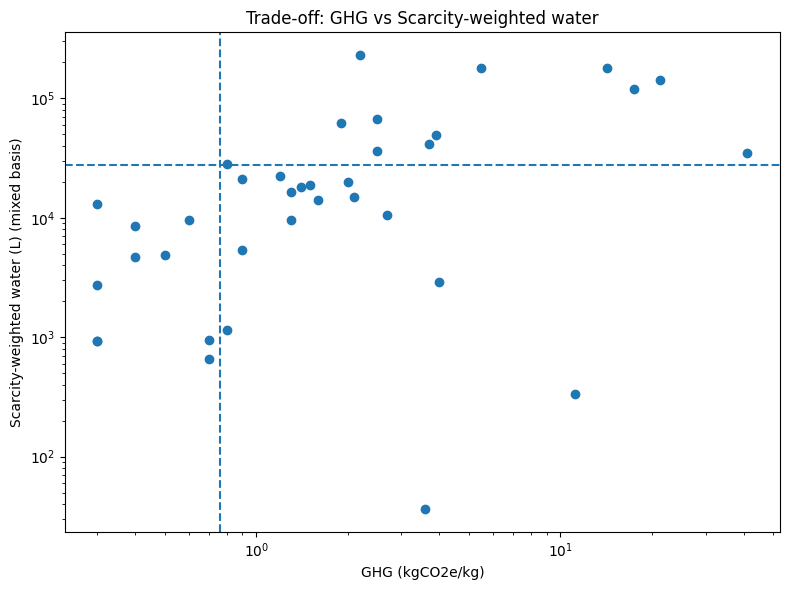

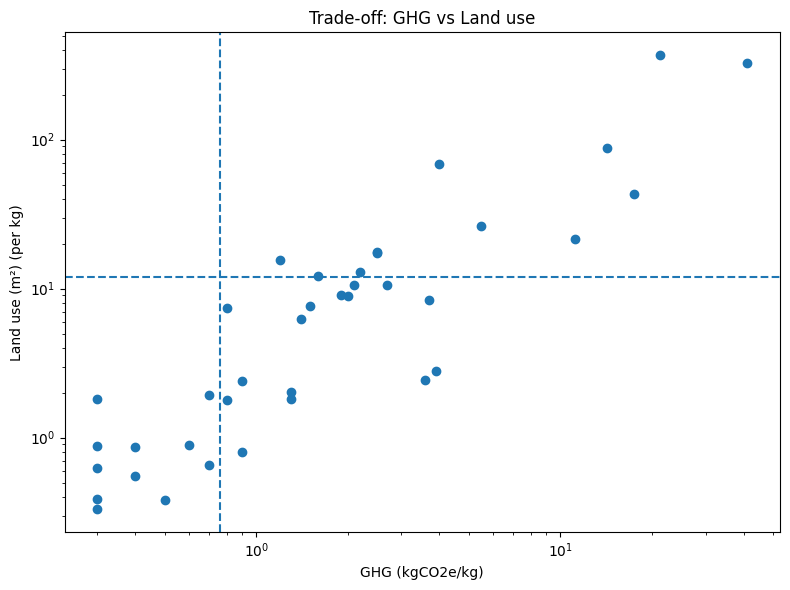

[trade-offs] Low GHG & High Scarcity-water: 0 item(s)
[trade-offs] Low GHG & High Land use: 0 item(s)
[trade-offs] Low GHG & High Freshwater: 1 item(s)
 - Brassicas

[recommendation] Balanced choices (low GHG and not high water/land):
 - Onions & Leeks
 - Root Vegetables
 - Cassava
 - Other Vegetables
 - Potatoes
 - Soymilk
 - Barley (Beer)
 - Maize (Meal)
 - Citrus Fruit
 - Bananas


In [44]:


import re, numpy as np, pandas as pd
import matplotlib.pyplot as plt

print("Q7. Consistency trade-offs — GHG vs water/land")

# ---------- helpers ----------
def safe_num(s): return pd.to_numeric(s, errors="coerce")

def detect_label(df):
    exact = {"food","food_product","product","item","entity","name"}
    low = {c.lower(): c for c in df.columns}
    for k in exact:
        if k in low: return low[k]
    obj = df.select_dtypes(include="object").columns.tolist()
    return obj[0] if obj else df.columns[0]

if "LABEL" not in globals():
    LABEL = detect_label(df)

def norm(s: str) -> str:
    s = s.lower().replace("_"," ").replace("-"," ")
    s = re.sub(r"[^\w\s]", " ", s)
    return re.sub(r"\s+"," ", s).strip()

def guess_stage_columns(df: pd.DataFrame) -> list:
    pats = [r"land\s*use\s*change", r"animal\s*feed", r"\bfarm\b", r"processing", r"transport", r"packaging", r"retail"]
    cols = []
    for pat in pats:
        m = [c for c in df.columns if re.search(pat, c, re.I)]
        if m: cols.append(m[0])
    return cols

def ensure_ghg_perkg(df):
    if "ghg_total_perkg" in df.columns and safe_num(df["ghg_total_perkg"]).notna().any():
        return "ghg_total_perkg", "per kg"
    # try to find another per-kg GHG column
    cands = [c for c in df.columns if re.search(r"(ghg|emission|co2|co₂).*(per\s*kg|\bper[_\s]*kilogram\b|\b/kg\b)", c, re.I)
             and not re.search(r"1000.*kcal|100\s*g.*protein", c, re.I)]
    if cands:
        df["ghg_total_perkg"] = safe_num(df[cands[0]])
        return "ghg_total_perkg", "per kg"
    # build from stages if possible
    stages = guess_stage_columns(df)
    if stages:
        df["ghg_total_perkg"] = df[stages].apply(pd.to_numeric, errors="coerce").sum(axis=1, min_count=1)
        return "ghg_total_perkg", "per kg"
    # fallback to other bases (last resort)
    per100p = next((c for c in df.columns if re.search(r"(ghg|emission|co2|co₂).*100\s*g.*protein", c, re.I)), None)
    if per100p: return per100p, "/100g protein"
    per1kk   = next((c for c in df.columns if re.search(r"(ghg|emission|co2|co₂).*1000.*kcal", c, re.I)), None)
    if per1kk: return per1kk, "/1k kcal"
    return None, None

def find_water_cols(df):
    cols = list(df.columns); nc = {c: norm(c) for c in cols}
    def pick(token_sets):
        for toks in token_sets:
            for c,n in nc.items():
                if all(t in n for t in toks) and not ("1000 kcal" in n or "100 g protein" in n):
                    return c, "per kg"
        return None, None
    scarce, scarce_basis = pick([["scarcity","water","per","kg"], ["scarcity","weight","water","per","kg"]])
    fresh, fresh_basis   = pick([["freshwater","withdrawal","per","kg"], ["fresh","water","withdrawal","per","kg"]])
    # fallback to any basis if per-kg not found
    if scarce is None:
        scarce = next((c for c in cols if "scarcity" in nc[c] and "water" in nc[c]), None)
        if scarce: scarce_basis = "mixed basis"
    if fresh is None:
        fresh = next((c for c in cols if "fresh" in nc[c] and "water" in nc[c]), None)
        if fresh: fresh_basis = "mixed basis"
    return (scarce, scarce_basis), (fresh, fresh_basis)

def find_land_col(df):
    cols = list(df.columns); nc = {c: norm(c) for c in cols}
    # prefer per kg with m2
    for c,n in nc.items():
        if "land" in n and "use" in n and ("per kg" in n or "per kilogram" in n) and ("m2" in n or "m 2" in n or "m²" in n):
            return c, "per kg"
    # fallback to any land-use column
    for c,n in nc.items():
        if "land" in n and "use" in n:
            if ("1000 kcal" in n) or ("100 g protein" in n): basis="alt basis"
            else: basis="mixed basis"
            return c, basis
    return None, None

def axis_label(ghg_col, ghg_basis, other_name, basis_hint):
    left = "GHG (kgCO2e/" + ( "kg" if ghg_basis=="per kg" else ghg_basis.replace("/","") ) + ")"
    right = f"{other_name} ({'per kg' if basis_hint=='per kg' else basis_hint})"
    return left, right

def scatter_tradeoff(x, y, xlab, ylab, xthr, ythr, title):
    m = x.notna() & y.notna()
    x = x[m]; y = y[m]
    if x.empty or y.empty:
        print(f"[skip plot] {title} — no overlapping data"); return
    fig, ax = plt.subplots(figsize=(8,6))
    ax.scatter(x, y)
    # choose log scale if spread is wide
    if (x.max()/max(x.min(),1e-12)) > 20: ax.set_xscale("log")
    if (y.max()/max(y.min(),1e-12)) > 20: ax.set_yscale("log")
    # threshold lines
    ax.axvline(xthr, linestyle="--")
    ax.axhline(ythr, linestyle="--")
    ax.set_xlabel(xlab); ax.set_ylabel(ylab); ax.set_title(title)
    plt.tight_layout(); plt.show()

# ---------- detect columns ----------
ghg_col, ghg_basis = ensure_ghg_perkg(df)
(scarce_col, scarce_basis), (fresh_col, fresh_basis) = find_water_cols(df)
land_col, land_basis = find_land_col(df)

print(f"Detected → GHG: {ghg_col!r} [{ghg_basis}], Scarcity-water: {scarce_col!r} [{scarce_basis}], Freshwater: {fresh_col!r} [{fresh_basis}], Land: {land_col!r} [{land_basis}]")

if ghg_col is None:
    print("[stop] No GHG column found. Cannot run Q7."); raise SystemExit

# ---------- build series ----------
g = safe_num(df[ghg_col])
scar = safe_num(df[scarce_col]) if scarce_col else None
fresh = safe_num(df[fresh_col]) if fresh_col else None
land = safe_num(df[land_col]) if land_col else None

# thresholds: low GHG = P30; high other = P70
gx = g.dropna()
g_low_thr = float(gx.quantile(0.30)) if not gx.empty else np.nan

def hi_thr(s):
    s = s.dropna(); 
    return float(s.quantile(0.70)) if not s.empty else np.nan

scar_hi_thr  = hi_thr(scar)  if scarce_col else np.nan
fresh_hi_thr = hi_thr(fresh) if fresh_col  else np.nan
land_hi_thr  = hi_thr(land)  if land_col   else np.nan

# ---------- A) Scatter: GHG vs Scarcity-weighted water ----------
if scarce_col:
    xlab, ylab = axis_label(ghg_col, ghg_basis, "Scarcity-weighted water (L)", scarce_basis)
    scatter_tradeoff(g, scar, xlab, ylab, g_low_thr, scar_hi_thr,
                     "Trade-off: GHG vs Scarcity-weighted water")
else:
    print("[note] No scarcity-weighted water column detected.")

# ---------- B) Scatter: GHG vs Land use ----------
if land_col:
    xlab, ylab = axis_label(ghg_col, ghg_basis, "Land use (m²)", land_basis)
    scatter_tradeoff(g, land, xlab, ylab, g_low_thr, land_hi_thr,
                     "Trade-off: GHG vs Land use")
else:
    print("[note] No land-use column detected.")

# ---------- C) Identify trade-off items and a balanced set ----------
names = df[LABEL].astype(str)

def list_tradeoffs(label, other_series, other_thr):
    if other_series is None or np.isnan(other_thr) or np.isnan(g_low_thr):
        print(f"[trade-offs] {label}: insufficient data"); return []
    mask = (g <= g_low_thr) & (other_series >= other_thr)
    items = names[mask.fillna(False)].tolist()
    print(f"[trade-offs] Low GHG & High {label}: {len(items)} item(s)")
    for it in items[:10]: print(" -", it)
    return items

lowG_highScar  = list_tradeoffs("Scarcity-water", scar,  scar_hi_thr)  if scarce_col else []
lowG_highLand  = list_tradeoffs("Land use",       land,  land_hi_thr)  if land_col  else []
lowG_highFresh = list_tradeoffs("Freshwater",     fresh, fresh_hi_thr) if fresh_col else []

# Recommended balance: items with GHG ≤ P30 AND not high on water or land
balanced_mask = g <= g_low_thr
if scarce_col: balanced_mask &= ~ (scar >= scar_hi_thr)
if land_col:   balanced_mask &= ~ (land >= land_hi_thr)
if fresh_col:  balanced_mask &= ~ (fresh >= fresh_hi_thr)

balanced = df.loc[balanced_mask.fillna(False), [LABEL]].copy()
# rank by combined percent ranks (lower is better) for available metrics
ranks = []
for idx in balanced.index:
    vals = []
    if not np.isnan(g[idx]): vals.append(g.rank(pct=True)[idx])        # lower better
    if scarce_col and not np.isnan(scar[idx]): vals.append(scar.rank(pct=True)[idx])
    if land_col and not np.isnan(land[idx]):   vals.append(land.rank(pct=True)[idx])
    if fresh_col and not np.isnan(fresh[idx]): vals.append(fresh.rank(pct=True)[idx])
    ranks.append(np.mean(vals) if vals else np.nan)
balanced["score"] = ranks
balanced = balanced.dropna(subset=["score"]).sort_values("score").head(10)

print("\n[recommendation] Balanced choices (low GHG and not high water/land):")
for _, r in balanced.iterrows():
    print(" -", r[LABEL])


#### Q8:  Scenario impact: if a retailer shifts X% of sales from high- to medium-impact foods, what is the projected GHG/water reduction?

Q8. Scenario impact — shift sales from High → Medium

Buckets by GHG/kg: Low < P40, Medium in [40, 70), High ≥ P70
High items:  14  | weight=32.56%
Medium items:12 | weight=27.91%
Shifted 20% of High-group sales into Medium group.

Baseline vs Scenario totals (weighted by sales shares):
 - GHG:         3.9884  →  3.4314  (14.0% ↓)
 - Scarcity H2O:32350.7512  →  30646.7812  (5.3% ↓)
 - Freshwater:  351.7598  →  334.3383  (5.0% ↓)


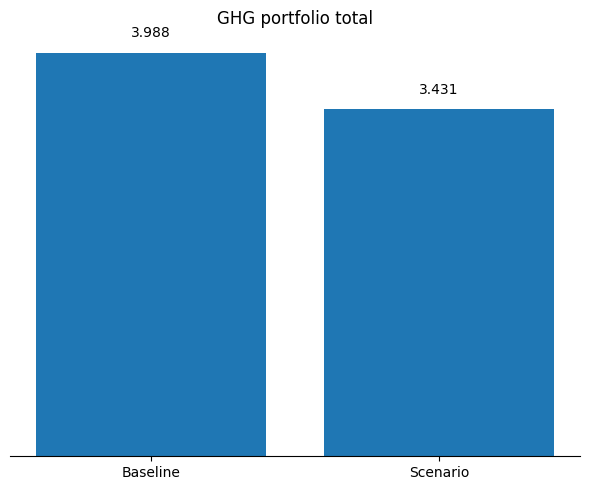

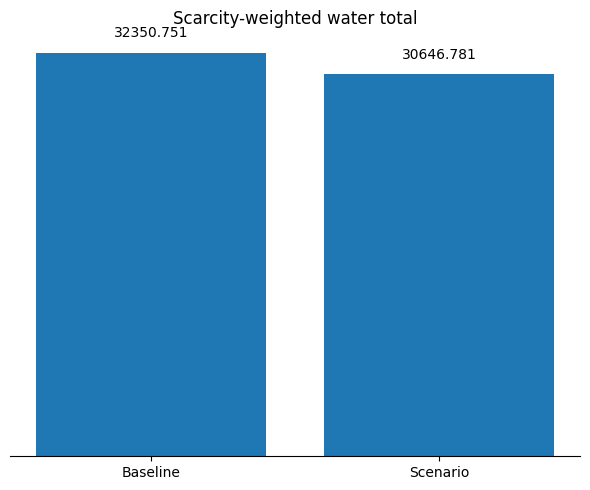

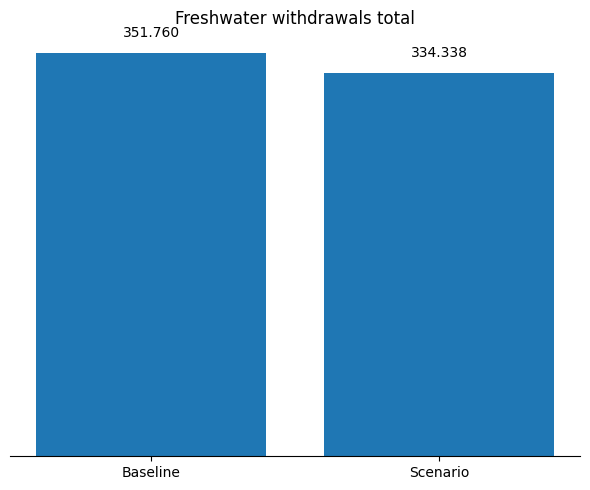


Top High→Medium shifts (by absolute share change):
 - Rice: 2.33% → 1.86%  (Δ -0.47%)
 - Palm Oil: 2.33% → 1.86%  (Δ -0.47%)
 - Sunflower Oil: 2.33% → 1.86%  (Δ -0.47%)
 - Rapeseed Oil: 2.33% → 1.86%  (Δ -0.47%)
 - Olive Oil: 2.33% → 1.86%  (Δ -0.47%)
 + Wheat & Rye (Bread): 2.33% → 2.87%  (Δ 0.54%)
 + Oatmeal: 2.33% → 2.87%  (Δ 0.54%)
 + Cane Sugar: 2.33% → 2.87%  (Δ 0.54%)
 + Beet Sugar: 2.33% → 2.87%  (Δ 0.54%)
 + Other Pulses: 2.33% → 2.87%  (Δ 0.54%)


In [45]:
import re, numpy as np, pandas as pd
import matplotlib.pyplot as plt

print("Q8. Scenario impact — shift sales from High → Medium")

# ==== Parameters you can tweak ====
SHIFT_PCT = 0.20          # 20% of HIGH group's sales moved to the MEDIUM group
HI_Q      = 0.70          # High-impact = top 30% by GHG/kg
LO_Q      = 0.40          # Medium-impact sits between LO_Q and HI_Q (i.e., 40–70%)
WEIGHT_COL_CANDIDATES = [
    "sales_share","share","sales_weight","weight","volume_share","revenue_share","market_share"
]
# ==================================

# ---------- helpers ----------
def safe_num(s): return pd.to_numeric(s, errors="coerce")

def detect_label(df):
    exact = {"food","food_product","product","item","entity","name"}
    low = {c.lower(): c for c in df.columns}
    for k in exact:
        if k in low: return low[k]
    obj = df.select_dtypes(include="object").columns.tolist()
    return obj[0] if obj else df.columns[0]

def guess_stage_columns(df: pd.DataFrame) -> list:
    pats = [r"land\s*use\s*change", r"animal\s*feed", r"\bfarm\b", r"processing", r"transport", r"packaging", r"retail"]
    cols = []
    for pat in pats:
        m = [c for c in df.columns if re.search(pat, c, re.I)]
        if m: cols.append(m[0])
    return cols

def ensure_ghg_perkg(df):
    # prefer existing 'ghg_total_perkg'
    if "ghg_total_perkg" in df.columns and safe_num(df["ghg_total_perkg"]).notna().any():
        return "ghg_total_perkg", "per kg"
    # any other per-kg GHG column
    cands = [c for c in df.columns if re.search(r"(ghg|emission|co2|co₂).*(per\s*kg|\b/kg\b)", c, re.I)
             and not re.search(r"1000.*kcal|100\s*g.*protein", c, re.I)]
    if cands:
        df["ghg_total_perkg"] = safe_num(df[cands[0]])
        return "ghg_total_perkg", "per kg"
    # build from stages if present
    stages = guess_stage_columns(df)
    if stages:
        df["ghg_total_perkg"] = df[stages].apply(pd.to_numeric, errors="coerce").sum(axis=1, min_count=1)
        return "ghg_total_perkg", "per kg"
    # fallbacks (not ideal for sales reallocation, but better than nothing)
    per100p = next((c for c in df.columns if re.search(r"(ghg|emission|co2|co₂).*100\s*g.*protein", c, re.I)), None)
    per1kk  = next((c for c in df.columns if re.search(r"(ghg|emission|co2|co₂).*1000.*kcal", c, re.I)), None)
    return (per100p or per1kk), ("per 100g protein" if per100p else ("/1k kcal" if per1kk else None))

def norm(s: str) -> str:
    s = s.lower().replace("_"," ").replace("-"," ")
    s = re.sub(r"[^\w\s]", " ", s)
    return re.sub(r"\s+"," ", s).strip()

def find_water_cols(df):
    cols = list(df.columns); nc = {c: norm(c) for c in cols}
    scarce = next((c for c in cols if all(t in nc[c] for t in ["scarcity","water","per","kg"])), None)
    fresh  = next((c for c in cols if all(t in nc[c] for t in ["fresh","water","withdraw","per","kg"])), None)
    if scarce is None:
        scarce = next((c for c in cols if "scarcity" in nc[c] and "water" in nc[c]), None)
    if fresh is None:
        fresh  = next((c for c in cols if "fresh" in nc[c] and "water" in nc[c]), None)
    return scarce, fresh

def detect_weights(df):
    # try to find an existing share/weight column
    for c in WEIGHT_COL_CANDIDATES:
        if c in df.columns:
            w = safe_num(df[c])
            if not w.notna().any(): 
                continue
            s = w.sum()
            if 0.95 <= s <= 1.05: return w.fillna(0.0)
            if 95 <= s <= 105:    return (w/100.0).fillna(0.0)
            # if it's raw sales, normalize to shares
            if s > 0:             return (w/s).fillna(0.0)
    # default: equal shares
    return pd.Series(np.ones(len(df)) / len(df), index=df.index)

def bars_baseline_scenario(metric_name, base_val, scen_val, unit=""):
    """Two bars, values annotated, numeric axis hidden."""
    vals = [float(base_val), float(scen_val)]
    labels = ["Baseline", "Scenario"]
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.bar(labels, vals)
    ax.yaxis.set_visible(False)
    for spine in ["top","right","left","bottom"]:
        if spine != "bottom":
            ax.spines[spine].set_visible(False)
    ymax = max(vals) if max(vals) > 0 else 1.0
    pad = 0.03 * ymax
    for i, v in enumerate(vals):
        ax.text(i, v + pad, f"{v:.3f}{(' ' + unit) if unit else ''}", ha="center", va="bottom")
    ax.set_title(metric_name)
    plt.tight_layout(); plt.show()

# ---------- detect basics ----------
if "LABEL" not in globals():
    LABEL = detect_label(df)

ghg_col, ghg_basis = ensure_ghg_perkg(df)
if ghg_col is None:
    print("[stop] No GHG intensity column found; cannot run scenario."); raise SystemExit

scarce_col, fresh_col = find_water_cols(df)

# ---------- build working frame ----------
work = pd.DataFrame({
    LABEL: df[LABEL].astype(str),
    "ghg":  safe_num(df[ghg_col])
})
if scarce_col: work["scarcity_water"] = safe_num(df[scarce_col])
if fresh_col:  work["freshwater"]     = safe_num(df[fresh_col])

weights = detect_weights(df).astype(float)
weights.index = df.index
weights = weights.clip(lower=0)
if weights.sum() <= 0:
    weights = pd.Series(np.ones(len(df)) / len(df), index=df.index)
else:
    weights = weights / weights.sum()

work["w"] = weights.values

# drop rows with missing GHG
work = work.dropna(subset=["ghg"]).reset_index(drop=True)

# ---------- classify High / Medium / Low by GHG ----------
q_hi = work["ghg"].quantile(HI_Q)
q_lo = work["ghg"].quantile(LO_Q)

def bucket(g):
    if g >= q_hi: return "High"
    if g < q_lo:  return "Low"
    return "Medium"

work["bucket"] = work["ghg"].map(bucket)

# ensure Medium non-empty; if empty, widen band
if (work["bucket"] == "Medium").sum() == 0:
    q_lo = work["ghg"].quantile(0.30)
    q_hi = work["ghg"].quantile(0.60)
    work["bucket"] = work["ghg"].map(lambda g: "High" if g >= q_hi else ("Low" if g < q_lo else "Medium"))

# ---------- baseline portfolio impacts ----------
def portfolio_total(colname):
    if colname not in work.columns: return np.nan
    s = (work["w"] * work[colname]).sum(skipna=True)
    return float(s)

base_ghg   = portfolio_total("ghg")
base_scar  = portfolio_total("scarcity_water")
base_fresh = portfolio_total("freshwater")

# ---------- scenario reallocation: shift X% of HIGH group's sales to MEDIUM group ----------
w = work["w"].copy()
mask_H = work["bucket"].eq("High")
mask_M = work["bucket"].eq("Medium")

w_H_sum = w[mask_H].sum()
w_M_sum = w[mask_M].sum()

if w_H_sum > 0 and w_M_sum > 0:
    shift_amt = min(SHIFT_PCT * w_H_sum, w_H_sum)  # absolute share to move
    # reduce high proportionally
    w.loc[mask_H] = w.loc[mask_H] * (1 - SHIFT_PCT)
    # increase medium proportionally to current distribution
    w.loc[mask_M] = w.loc[mask_M] + shift_amt * (w.loc[mask_M] / w_M_sum)
else:
    print("[note] High or Medium bucket empty; scenario falls back to uniform scaling among available groups.")
# renormalize (should already sum to 1, but keep safe)
w = w / w.sum()
work["w_scn"] = w

# ---------- scenario portfolio impacts ----------
def portfolio_total_scn(colname):
    if colname not in work.columns: return np.nan
    s = (work["w_scn"] * work[colname]).sum(skipna=True)
    return float(s)

scn_ghg   = portfolio_total_scn("ghg")
scn_scar  = portfolio_total_scn("scarcity_water")
scn_fresh = portfolio_total_scn("freshwater")

# ---------- report & plots ----------
def pct_reduction(base, new):
    if not np.isfinite(base) or base == 0: return np.nan
    return 100.0 * (base - new) / base

print(f"\nBuckets by GHG/kg: Low < P{int(LO_Q*100)}, Medium in [{int(LO_Q*100)}, {int(HI_Q*100)}), High ≥ P{int(HI_Q*100)}")
print(f"High items:  {int(mask_H.sum())}  | weight={w_H_sum:.2%}")
print(f"Medium items:{int(mask_M.sum())} | weight={w_M_sum:.2%}")
print(f"Shifted {SHIFT_PCT:.0%} of High-group sales into Medium group.\n")

print("Baseline vs Scenario totals (weighted by sales shares):")
print(f" - GHG:         {base_ghg:.4f}  →  {scn_ghg:.4f}  ({pct_reduction(base_ghg, scn_ghg):.1f}% ↓)")
if np.isfinite(base_scar):
    print(f" - Scarcity H2O:{base_scar:.4f}  →  {scn_scar:.4f}  ({pct_reduction(base_scar, scn_scar):.1f}% ↓)")
if np.isfinite(base_fresh):
    print(f" - Freshwater:  {base_fresh:.4f}  →  {scn_fresh:.4f}  ({pct_reduction(base_fresh, scn_fresh):.1f}% ↓)")

# KPI bar pairs (hide numeric axis, annotate values)
bars_baseline_scenario("GHG portfolio total", base_ghg, scn_ghg, unit="")
if np.isfinite(base_scar):  bars_baseline_scenario("Scarcity-weighted water total", base_scar, scn_scar, unit="")
if np.isfinite(base_fresh): bars_baseline_scenario("Freshwater withdrawals total", base_fresh, scn_fresh, unit="")

# ---------- (optional) Show top movers (which High items lost share; which Medium gained) ----------
top_losers = work.loc[mask_H, [LABEL, "w", "w_scn"]].assign(delta=lambda d: d["w_scn"]-d["w"]).sort_values("delta").head(5)
top_gainers = work.loc[mask_M, [LABEL, "w", "w_scn"]].assign(delta=lambda d: d["w_scn"]-d["w"]).sort_values("delta", ascending=False).head(5)

print("\nTop High→Medium shifts (by absolute share change):")
for _, r in top_losers.iterrows():
    print(f" - {r[LABEL]}: {r['w']:.2%} → {r['w_scn']:.2%}  (Δ {r['delta']:.2%})")
for _, r in top_gainers.iterrows():
    print(f" + {r[LABEL]}: {r['w']:.2%} → {r['w_scn']:.2%}  (Δ {r['delta']:.2%})")
